In [17]:
from numpy import math
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import math
np.core
from sys import maxsize
from numpy import set_printoptions
set_printoptions(threshold=maxsize)

print("hi")
#*****************Constants********************#
Lx = 100
Nx = 51
Ly = 100
Ny = 51
dx = int(Lx/(Nx-1)) #2
dy = int(Ly/(Ny-1)) #2


A= 1
r = 25
tol = 10**-7

x_int_1 = 50
y_int_1 = 25
x_int_2 = 50
y_int_2 = 75



VORT = np.zeros((Nx+2, Ny+2), dtype = float)

for i in range(1,Nx+1): #51 physical node
    for j in range(1,Ny+1):
        
        d_1 = min(1, (1/r)*(math.sqrt((i*dx-x_int_1)**2 + (j*dy - y_int_1)**2)))
        d_2 = min(1, (1/r)*(math.sqrt((i*dx-x_int_2)**2 + (j*dy - y_int_2)**2)))
        VORT[i][j] = 0.5*A*(math.cos(d_1*3.141592654)+1) + 0.5*A*(math.cos(d_2*3.141592654)+1)
        
#Boundary Condition
for j in range(1,Ny+1):
    VORT[Nx+1][j] = VORT[2][j]
    VORT[0][j] = VORT[Nx-1][j]
    VORT[1][j] = VORT[Nx][j]
for i in range(1,Nx+1):
    VORT[i][Ny+1] = VORT[i][2]
    VORT[i][0] = VORT[i][Ny-1]
    VORT[i][1] = VORT[i][Ny]
print("finish VORT initialize")
VORT_Avg = np.mean(VORT)

VORT_loop_counter = 0

        #AVERGING
while (VORT_Avg >=  tol):
    for i in range(0,Nx+2):
        for j in range(0,Ny+2):
            VORT[i][j] = VORT[i][j] - np.mean(VORT)
            
    VORT_Avg = np.mean(VORT)
    VORT_loop_counter+=1
    
print("VORT loop counter", VORT_loop_counter)


#*****************Advancing Lists********************#
PHI = np.zeros((Nx+2, Ny+2), dtype = float)
Residual = np.zeros((Nx+2, Ny+2), dtype = float)

#Initial residual:             #####UPDATE PHYSICAL ONLY???##########
for i in range( 1,Nx+1): 
    for j in range(1,Ny+1):
        Residual[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j]) + (1/dy**2)*(PHI[i][j-1] -2*PHI[i][j] + PHI[i][j+1]) - VORT[i][j]

for j in range(1,Ny+1):
    Residual[Nx+1][j] = Residual[2][j]
    Residual[0][j] = Residual[Nx-1][j]
    Residual[1][j] = Residual[Nx][j]
for i in range(1,Nx+1):
    Residual[i][Ny+1] = Residual[i][2]
    Residual[i][0] = Residual[i][Ny-1]
    Residual[i][1] = Residual[i][Ny]

print("finish Residual initialization")


PHI[0][0] = -999.0
PHI[0][52] = -999.0
PHI[52][52] = -999.0
PHI[52][0] = -999.0

Residual[0][0] = -999.0
Residual[0][52] = -999.0
Residual[52][52] = -999.0
Residual[52][0] = -999.0

#test #print(u_cur.shape)
#result = 53x53

###########################Criterion for Convergence#######################

EPS = np.amax(Residual)/((2*((1/dx**2)+(1/dy**2))*math.fsum(PHI,dtype= float64))+ np.amax(VORT))

########################### ALPHA #######################   

beta = dx/dy
sigma = (1/(1+beta**2))*(math.cos(3.141592654/Nx) + math.cos(3.141592654/Ny)*beta**2)
alpha = 2/(1+math.sqrt(1-sigma**2))
    
    
    
    
#***************MAIN LOOP*********************#

print("entering main loop")

while (EPS < tol):

    for j in range(1,Ny+1):  
        
        #update ghost nodes along phi[i][Ny+1]
        if (j == Ny):
            for i in range(1,Nx+1):
                PHI[i][Ny+1] = PHI[i][2]
        #update finish
        
        for i in range(1,Nx+1): #51 physical node
            
            #update ghost nodes along phi[Nx+1][j]
            if (i == Nx):
                for j in range(1,Ny+1):
                    PHI[Nx+1][j] = PHI[2][j]
            #update finish

            Residual[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j]) + (1/dy**2)*(PHI[i][j-1] -2*PHI[i][j] + PHI[i][j+1]) - VORT[i][j]

            PHI[i][j] = PHI[i][j] + (alpha*Residual[i][j])/(2*((1/dx**2)+(1/dy**2)))
        
        #Update ghosts at PHI[0][j]
        for j in range(1,Ny+1):
            PHI[0][j] = PHI[Nx-1][j]
        #update finish
    
    #Update ghosts at PHI[i][0]
    for i in range(1,Nx+1):
        PHI[i][0] = PHI[i][Ny-1]
    #update finish
    
    EPS = np.amax(Residual)/((2*((1/dx**2)+(1/dy**2))*math.fsum(PHI,dtype= float64))+ np.amax(VORT))
        

        
print(EPS)        
  
    
    
    
    
    
plt.figure(counter2)
x = np.linspace(0,51,51)
y = np.linspace(0,51,51)
X,Y = np.meshgrid(x,y)
plt.contourf(X,Y, PHI[1:-1,1:-1])
plt.colorbar()

    #shifting

hi
finish VORT initialize
VORT loop counter 14
finish Residual initialization
entering main loop


KeyboardInterrupt: 

In [ ]:
newarray = []
with open('Normalized_vorticity.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\t')
    for row in readCSV:
        newarray +=[converter(unpack(row[0]))]

        
print(newarray)
        
        
def unpack(string):
    result = []
    temp = ""
    i = 0
    while (i < len(string)):
        if string[i] == '.':
            if (string[i-2]=='-'):
                temp+="-0."
            else:
                temp+="0."
            for k in range(1,7):
                temp+=string[i+k]
            result+=[temp]
        temp =""
        i+=1
    return result


def converter(array):
    newarr= []
    for i in array:
        newarr+= [float(i)]
    return(newarr)

print(len(newarray))
            


hi
finish VORT initialize
VORT loop counter 1
mean vorticity =  -1.0799170520190873e-17
finish Residual initialization
This is initial EPS =  1.0
sigma = 0.998103328736549
alpha = 1.8840181363390607
entering main loop
EPS is 0.0009510245461748684   MainCounter = 0 Max of abs Value =  7.4086405281576635
 Index of max abs =  (28, 16)
EPS is 0.0004391633235691563   MainCounter = 1 Max of abs Value =  6.204682254622813
 Index of max abs =  (27, 15)
EPS is 0.0002595589541773603   MainCounter = 2 Max of abs Value =  5.217584375994562
 Index of max abs =  (27, 39)
EPS is 0.00017999876099671484   MainCounter = 3 Max of abs Value =  4.647519423739067
 Index of max abs =  (26, 38)
EPS is 0.00013737529419744163   MainCounter = 4 Max of abs Value =  4.197569379743508
 Index of max abs =  (26, 37)
EPS is 0.0001061793529177723   MainCounter = 5 Max of abs Value =  3.767850772902171
 Index of max abs =  (25, 37)
EPS is 8.675343401012325e-05   MainCounter = 6 Max of abs Value =  3.4346404482164425
 In

EPS is 2.450716441707736e-06   MainCounter = 71 Max of abs Value =  0.21168881068872164
 Index of max abs =  (49, 0)
EPS is 2.473442416299817e-06   MainCounter = 72 Max of abs Value =  0.21356661862525833
 Index of max abs =  (49, 0)
EPS is 2.419459242187159e-06   MainCounter = 73 Max of abs Value =  0.20882675103455345
 Index of max abs =  (49, 0)
EPS is 2.441476853852357e-06   MainCounter = 74 Max of abs Value =  0.21065375782325596
 Index of max abs =  (49, 0)
EPS is 2.4068120122979645e-06   MainCounter = 75 Max of abs Value =  0.20759468535995357
 Index of max abs =  (49, 0)
EPS is 2.424250533502982e-06   MainCounter = 76 Max of abs Value =  0.20903671134069018
 Index of max abs =  (49, 0)
EPS is 2.400131388916456e-06   MainCounter = 77 Max of abs Value =  0.2069008012562104
 Index of max abs =  (49, 0)
EPS is 2.4080874707664767e-06   MainCounter = 78 Max of abs Value =  0.20753646935905984
 Index of max abs =  (49, 0)
EPS is 2.390646537492523e-06   MainCounter = 79 Max of abs Valu

EPS is 2.2001013362628213e-06   MainCounter = 150 Max of abs Value =  0.1936857914791275
 Index of max abs =  (49, 0)
EPS is 2.1995951467854376e-06   MainCounter = 151 Max of abs Value =  0.193741935899221
 Index of max abs =  (49, 0)
EPS is 2.1985512191284244e-06   MainCounter = 152 Max of abs Value =  0.19375145050926484
 Index of max abs =  (49, 0)
EPS is 2.1963014450187708e-06   MainCounter = 153 Max of abs Value =  0.1936551516143568
 Index of max abs =  (49, 0)
EPS is 2.197252208276491e-06   MainCounter = 154 Max of abs Value =  0.1938414281196486
 Index of max abs =  (49, 0)
EPS is 2.1942615858536934e-06   MainCounter = 155 Max of abs Value =  0.19368073275063452
 Index of max abs =  (49, 0)
EPS is 2.1945307403631646e-06   MainCounter = 156 Max of abs Value =  0.19380855988357354
 Index of max abs =  (49, 0)
EPS is 2.192453639626228e-06   MainCounter = 157 Max of abs Value =  0.1937297434871073
 Index of max abs =  (49, 0)
EPS is 2.1920139994404944e-06   MainCounter = 158 Max of

EPS is 2.084245595920199e-06   MainCounter = 230 Max of abs Value =  0.19388552164029887
 Index of max abs =  (49, 0)
EPS is 2.082245042349849e-06   MainCounter = 231 Max of abs Value =  0.19386637112336885
 Index of max abs =  (49, 0)
EPS is 2.080641074080797e-06   MainCounter = 232 Max of abs Value =  0.19388474529072536
 Index of max abs =  (49, 0)
EPS is 2.078643684389233e-06   MainCounter = 233 Max of abs Value =  0.19386716146587452
 Index of max abs =  (49, 0)
EPS is 2.0770058050456135e-06   MainCounter = 234 Max of abs Value =  0.19388357835215514
 Index of max abs =  (49, 0)
EPS is 2.075020153146761e-06   MainCounter = 235 Max of abs Value =  0.19386820332835436
 Index of max abs =  (49, 0)
EPS is 2.073343485152164e-06   MainCounter = 236 Max of abs Value =  0.19388223048649517
 Index of max abs =  (49, 0)
EPS is 2.071374383297094e-06   MainCounter = 237 Max of abs Value =  0.19386941851010558
 Index of max abs =  (49, 0)
EPS is 2.069655931358465e-06   MainCounter = 238 Max of

EPS is 1.9214269137799357e-06   MainCounter = 309 Max of abs Value =  0.19387500740711788
 Index of max abs =  (49, 0)
EPS is 1.9190856349785375e-06   MainCounter = 310 Max of abs Value =  0.1938751634304932
 Index of max abs =  (49, 0)
EPS is 1.9167229817105552e-06   MainCounter = 311 Max of abs Value =  0.19387500070500702
 Index of max abs =  (49, 0)
EPS is 1.9143451886759523e-06   MainCounter = 312 Max of abs Value =  0.19387503858115968
 Index of max abs =  (49, 0)
EPS is 1.9119595153071416e-06   MainCounter = 313 Max of abs Value =  0.19387516516586284
 Index of max abs =  (49, 0)
EPS is 1.9095599897090393e-06   MainCounter = 314 Max of abs Value =  0.193874954034381
 Index of max abs =  (49, 0)
EPS is 1.9071547844615586e-06   MainCounter = 315 Max of abs Value =  0.19387512889743103
 Index of max abs =  (49, 0)
EPS is 1.9047491612170379e-06   MainCounter = 316 Max of abs Value =  0.19387506013294692
 Index of max abs =  (49, 0)
EPS is 1.9023499597629135e-06   MainCounter = 317 M

EPS is 1.7164266038604369e-06   MainCounter = 388 Max of abs Value =  0.19387506798674503
 Index of max abs =  (49, 0)
EPS is 1.7134738975724355e-06   MainCounter = 389 Max of abs Value =  0.19387506524995224
 Index of max abs =  (49, 0)
EPS is 1.7104977024094645e-06   MainCounter = 390 Max of abs Value =  0.19387507012089272
 Index of max abs =  (49, 0)
EPS is 1.7074919359765784e-06   MainCounter = 391 Max of abs Value =  0.19387506313125052
 Index of max abs =  (49, 0)
EPS is 1.7044616060151123e-06   MainCounter = 392 Max of abs Value =  0.19387507223155037
 Index of max abs =  (49, 0)
EPS is 1.7014164062764884e-06   MainCounter = 393 Max of abs Value =  0.19387506108448044
 Index of max abs =  (49, 0)
EPS is 1.6983704137331153e-06   MainCounter = 394 Max of abs Value =  0.1938750741019603
 Index of max abs =  (49, 0)
EPS is 1.6953060836278298e-06   MainCounter = 395 Max of abs Value =  0.19387505944849337
 Index of max abs =  (49, 0)
EPS is 1.6922300226677916e-06   MainCounter = 396

EPS is 1.472827783098607e-06   MainCounter = 467 Max of abs Value =  0.19387506646915825
 Index of max abs =  (49, 0)
EPS is 1.4701199333498461e-06   MainCounter = 468 Max of abs Value =  0.1938750677701651
 Index of max abs =  (49, 0)
EPS is 1.4674220036782671e-06   MainCounter = 469 Max of abs Value =  0.19387506660423043
 Index of max abs =  (49, 0)
EPS is 1.464733974870189e-06   MainCounter = 470 Max of abs Value =  0.19387506764821955
 Index of max abs =  (49, 0)
EPS is 1.4620557610180218e-06   MainCounter = 471 Max of abs Value =  0.19387506670812066
 Index of max abs =  (49, 0)
EPS is 1.4593873367474405e-06   MainCounter = 472 Max of abs Value =  0.19387506755604927
 Index of max abs =  (49, 0)
EPS is 1.4567286230932451e-06   MainCounter = 473 Max of abs Value =  0.19387506679988858
 Index of max abs =  (49, 0)
EPS is 1.4540795896894414e-06   MainCounter = 474 Max of abs Value =  0.19387506745745725
 Index of max abs =  (49, 0)
EPS is 1.4514401641870088e-06   MainCounter = 475 M

EPS is 1.2816153652472376e-06   MainCounter = 548 Max of abs Value =  0.19387506714561425
 Index of max abs =  (49, 0)
EPS is 1.2795644804407173e-06   MainCounter = 549 Max of abs Value =  0.1938750671631882
 Index of max abs =  (49, 0)
EPS is 1.2775201487071493e-06   MainCounter = 550 Max of abs Value =  0.19387506714542285
 Index of max abs =  (49, 0)
EPS is 1.2754823391520508e-06   MainCounter = 551 Max of abs Value =  0.19387506716293817
 Index of max abs =  (49, 0)
EPS is 1.2734510201566013e-06   MainCounter = 552 Max of abs Value =  0.19387506714608455
 Index of max abs =  (49, 0)
EPS is 1.271426161199191e-06   MainCounter = 553 Max of abs Value =  0.1938750671618928
 Index of max abs =  (49, 0)
EPS is 1.2694077311016876e-06   MainCounter = 554 Max of abs Value =  0.19387506714748298
 Index of max abs =  (49, 0)
EPS is 1.2673956996691085e-06   MainCounter = 555 Max of abs Value =  0.1938750671601715
 Index of max abs =  (49, 0)
EPS is 1.2653900361942046e-06   MainCounter = 556 Ma

EPS is 1.1391950892526442e-06   MainCounter = 626 Max of abs Value =  0.19387506715514707
 Index of max abs =  (49, 0)
EPS is 1.1375744015809724e-06   MainCounter = 627 Max of abs Value =  0.19387506715338138
 Index of max abs =  (49, 0)
EPS is 1.1359583187557232e-06   MainCounter = 628 Max of abs Value =  0.19387506715527142
 Index of max abs =  (49, 0)
EPS is 1.1343468211352148e-06   MainCounter = 629 Max of abs Value =  0.19387506715328545
 Index of max abs =  (49, 0)
EPS is 1.132739889279158e-06   MainCounter = 630 Max of abs Value =  0.19387506715531938
 Index of max abs =  (49, 0)
EPS is 1.1311375037640062e-06   MainCounter = 631 Max of abs Value =  0.19387506715327657
 Index of max abs =  (49, 0)
EPS is 1.129539645370585e-06   MainCounter = 632 Max of abs Value =  0.1938750671553096
 Index of max abs =  (49, 0)
EPS is 1.127946294893508e-06   MainCounter = 633 Max of abs Value =  0.19387506715329256
 Index of max abs =  (49, 0)
EPS is 1.1263574333296078e-06   MainCounter = 634 Ma

EPS is 1.021333544240223e-06   MainCounter = 707 Max of abs Value =  0.19387506715427577
 Index of max abs =  (49, 0)
EPS is 1.020030670780816e-06   MainCounter = 708 Max of abs Value =  0.1938750671543104
 Index of max abs =  (49, 0)
EPS is 1.0187311171310474e-06   MainCounter = 709 Max of abs Value =  0.1938750671542953
 Index of max abs =  (49, 0)
EPS is 1.0174348706187428e-06   MainCounter = 710 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 1.01614191863579e-06   MainCounter = 711 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 1.0148522486379765e-06   MainCounter = 712 Max of abs Value =  0.19387506715429176
 Index of max abs =  (49, 0)
EPS is 1.013565848145038e-06   MainCounter = 713 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 1.0122827047393092e-06   MainCounter = 714 Max of abs Value =  0.19387506715427488
 Index of max abs =  (49, 0)
EPS is 1.0110028060670066e-06   MainCounter = 715 Max o

EPS is 9.277211102975781e-07   MainCounter = 786 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 9.266460007821085e-07   MainCounter = 787 Max of abs Value =  0.1938750671542953
 Index of max abs =  (49, 0)
EPS is 9.255733802098297e-07   MainCounter = 788 Max of abs Value =  0.19387506715430952
 Index of max abs =  (49, 0)
EPS is 9.245032399473931e-07   MainCounter = 789 Max of abs Value =  0.1938750671542882
 Index of max abs =  (49, 0)
EPS is 9.23435571401965e-07   MainCounter = 790 Max of abs Value =  0.19387506715430952
 Index of max abs =  (49, 0)
EPS is 9.223703660196168e-07   MainCounter = 791 Max of abs Value =  0.1938750671542953
 Index of max abs =  (49, 0)
EPS is 9.213076152864759e-07   MainCounter = 792 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 9.202473107274585e-07   MainCounter = 793 Max of abs Value =  0.1938750671542953
 Index of max abs =  (49, 0)
EPS is 9.191894439067116e-07   MainCounter = 794 Max of abs V

EPS is 8.507325005758468e-07   MainCounter = 864 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 8.498283398365316e-07   MainCounter = 865 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 8.489260989456518e-07   MainCounter = 866 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 8.48025771794892e-07   MainCounter = 867 Max of abs Value =  0.19387506715429886
 Index of max abs =  (49, 0)
EPS is 8.471273523018537e-07   MainCounter = 868 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 8.462308344099171e-07   MainCounter = 869 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 8.453362120880669e-07   MainCounter = 870 Max of abs Value =  0.19387506715430242
 Index of max abs =  (49, 0)
EPS is 8.444434793306558e-07   MainCounter = 871 Max of abs Value =  0.19387506715429176
 Index of max abs =  (49, 0)
EPS is 8.435526301575961e-07   MainCounter = 872 Max of abs V

EPS is 7.855428132866536e-07   MainCounter = 942 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 7.84771848245096e-07   MainCounter = 943 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 7.840023950354087e-07   MainCounter = 944 Max of abs Value =  0.19387506715431663
 Index of max abs =  (49, 0)
EPS is 7.832344492146614e-07   MainCounter = 945 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 7.824680063582107e-07   MainCounter = 946 Max of abs Value =  0.19387506715430242
 Index of max abs =  (49, 0)
EPS is 7.817030620576907e-07   MainCounter = 947 Max of abs Value =  0.1938750671542953
 Index of max abs =  (49, 0)
EPS is 7.809396119226021e-07   MainCounter = 948 Max of abs Value =  0.19387506715429886
 Index of max abs =  (49, 0)
EPS is 7.801776515792724e-07   MainCounter = 949 Max of abs Value =  0.19387506715428465
 Index of max abs =  (49, 0)
EPS is 7.794171766714755e-07   MainCounter = 950 Max of ab

EPS is 7.349981229069652e-07   MainCounter = 1012 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 7.343231367708184e-07   MainCounter = 1013 Max of abs Value =  0.1938750671543042
 Index of max abs =  (49, 0)
EPS is 7.336493892452483e-07   MainCounter = 1014 Max of abs Value =  0.19387506715429886
 Index of max abs =  (49, 0)
EPS is 7.32976876924121e-07   MainCounter = 1015 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 7.323055964139614e-07   MainCounter = 1016 Max of abs Value =  0.19387506715430597
 Index of max abs =  (49, 0)
EPS is 7.316355443331445e-07   MainCounter = 1017 Max of abs Value =  0.1938750671542882
 Index of max abs =  (49, 0)
EPS is 7.309667173130001e-07   MainCounter = 1018 Max of abs Value =  0.19387506715429176
 Index of max abs =  (49, 0)
EPS is 7.302991119968098e-07   MainCounter = 1019 Max of abs Value =  0.1938750671542882
 Index of max abs =  (49, 0)
EPS is 7.296327250403013e-07   MainCounter = 1020 Ma

EPS is 6.858262926015032e-07   MainCounter = 1090 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 6.852385633080781e-07   MainCounter = 1091 Max of abs Value =  0.19387506715431485
 Index of max abs =  (49, 0)
EPS is 6.846518404789469e-07   MainCounter = 1092 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 6.840661215315485e-07   MainCounter = 1093 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 6.834814038913504e-07   MainCounter = 1094 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 6.828976849931402e-07   MainCounter = 1095 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 6.823149622798744e-07   MainCounter = 1096 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 6.817332332039158e-07   MainCounter = 1097 Max of abs Value =  0.1938750671543042
 Index of max abs =  (49, 0)
EPS is 6.811524952256349e-07   MainCounter = 1098 

EPS is 6.412745625405211e-07   MainCounter = 1171 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 6.407606830563247e-07   MainCounter = 1172 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 6.402476264977472e-07   MainCounter = 1173 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 6.397353908898568e-07   MainCounter = 1174 Max of abs Value =  0.19387506715428998
 Index of max abs =  (49, 0)
EPS is 6.392239742636622e-07   MainCounter = 1175 Max of abs Value =  0.19387506715427577
 Index of max abs =  (49, 0)
EPS is 6.387133746568493e-07   MainCounter = 1176 Max of abs Value =  0.1938750671543184
 Index of max abs =  (49, 0)
EPS is 6.382035901125976e-07   MainCounter = 1177 Max of abs Value =  0.193875067154258
 Index of max abs =  (49, 0)
EPS is 6.376946186815552e-07   MainCounter = 1178 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 6.371864584193113e-07   MainCounter = 1179 M

EPS is 6.03066276318927e-07   MainCounter = 1250 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 6.026117865869492e-07   MainCounter = 1251 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 6.0215798137456e-07   MainCounter = 1252 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 6.017048591365608e-07   MainCounter = 1253 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 6.012524183321921e-07   MainCounter = 1254 Max of abs Value =  0.19387506715426156
 Index of max abs =  (49, 0)
EPS is 6.008006574258529e-07   MainCounter = 1255 Max of abs Value =  0.19387506715433617
 Index of max abs =  (49, 0)
EPS is 6.003495748853661e-07   MainCounter = 1256 Max of abs Value =  0.19387506715426867
 Index of max abs =  (49, 0)
EPS is 5.998991691846694e-07   MainCounter = 1257 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 5.994494388010469e-07   MainCounter = 1258 Ma

EPS is 5.691550025638479e-07   MainCounter = 1329 Max of abs Value =  0.19387506715426867
 Index of max abs =  (49, 0)
EPS is 5.687501717990352e-07   MainCounter = 1330 Max of abs Value =  0.1938750671543113
 Index of max abs =  (49, 0)
EPS is 5.683459165239566e-07   MainCounter = 1331 Max of abs Value =  0.1938750671543184
 Index of max abs =  (49, 0)
EPS is 5.679422355123262e-07   MainCounter = 1332 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 5.675391275416409e-07   MainCounter = 1333 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 5.671365913923569e-07   MainCounter = 1334 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 5.667346258487203e-07   MainCounter = 1335 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 5.663332296982344e-07   MainCounter = 1336 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 5.659324017320322e-07   MainCounter = 1337 M

EPS is 5.388544510001955e-07   MainCounter = 1408 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 5.3849156368368e-07   MainCounter = 1409 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 5.381291648055107e-07   MainCounter = 1410 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 5.377672533801801e-07   MainCounter = 1411 Max of abs Value =  0.1938750671542971
 Index of max abs =  (49, 0)
EPS is 5.374058284248208e-07   MainCounter = 1412 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 5.370448889593434e-07   MainCounter = 1413 Max of abs Value =  0.19387506715428998
 Index of max abs =  (49, 0)
EPS is 5.366844340061521e-07   MainCounter = 1414 Max of abs Value =  0.1938750671543042
 Index of max abs =  (49, 0)
EPS is 5.363244625901557e-07   MainCounter = 1415 Max of abs Value =  0.19387506715426867
 Index of max abs =  (49, 0)
EPS is 5.359649737393691e-07   MainCounter = 1416 Max 

EPS is 5.119446493670742e-07   MainCounter = 1486 Max of abs Value =  0.1938750671543184
 Index of max abs =  (49, 0)
EPS is 5.116170904226829e-07   MainCounter = 1487 Max of abs Value =  0.19387506715426156
 Index of max abs =  (49, 0)
EPS is 5.112899503764362e-07   MainCounter = 1488 Max of abs Value =  0.1938750671543184
 Index of max abs =  (49, 0)
EPS is 5.109632284247165e-07   MainCounter = 1489 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 5.106369237669784e-07   MainCounter = 1490 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 5.103110356040661e-07   MainCounter = 1491 Max of abs Value =  0.1938750671543042
 Index of max abs =  (49, 0)
EPS is 5.099855631390402e-07   MainCounter = 1492 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 5.096605055770671e-07   MainCounter = 1493 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 5.093358621254325e-07   MainCounter = 1494 M

EPS is 4.899850076050163e-07   MainCounter = 1556 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 4.896849387306394e-07   MainCounter = 1557 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 4.893852371580125e-07   MainCounter = 1558 Max of abs Value =  0.19387506715426156
 Index of max abs =  (49, 0)
EPS is 4.890859022135346e-07   MainCounter = 1559 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 4.887869332244822e-07   MainCounter = 1560 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 4.884883295205541e-07   MainCounter = 1561 Max of abs Value =  0.1938750671543113
 Index of max abs =  (49, 0)
EPS is 4.881900904322097e-07   MainCounter = 1562 Max of abs Value =  0.19387506715424735
 Index of max abs =  (49, 0)
EPS is 4.878922152926595e-07   MainCounter = 1563 Max of abs Value =  0.1938750671543255
 Index of max abs =  (49, 0)
EPS is 4.875947034354095e-07   MainCounter = 1564 Ma

EPS is 4.6736029318510786e-07   MainCounter = 1635 Max of abs Value =  0.1938750671543113
 Index of max abs =  (49, 0)
EPS is 4.6708728776412456e-07   MainCounter = 1636 Max of abs Value =  0.19387506715426867
 Index of max abs =  (49, 0)
EPS is 4.668146011057018e-07   MainCounter = 1637 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 4.6654223265169444e-07   MainCounter = 1638 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 4.66270181845464e-07   MainCounter = 1639 Max of abs Value =  0.19387506715427577
 Index of max abs =  (49, 0)
EPS is 4.659984481317721e-07   MainCounter = 1640 Max of abs Value =  0.1938750671543042
 Index of max abs =  (49, 0)
EPS is 4.6572703095627294e-07   MainCounter = 1641 Max of abs Value =  0.19387506715425445
 Index of max abs =  (49, 0)
EPS is 4.6545592976656793e-07   MainCounter = 1642 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 4.65185144010871e-07   MainCounter = 16

EPS is 4.4924258616884133e-07   MainCounter = 1704 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 4.489903314387553e-07   MainCounter = 1705 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 4.487383598374112e-07   MainCounter = 1706 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 4.48486670888289e-07   MainCounter = 1707 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 4.482352641162496e-07   MainCounter = 1708 Max of abs Value =  0.19387506715428288
 Index of max abs =  (49, 0)
EPS is 4.479841390468325e-07   MainCounter = 1709 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 4.4773329520700933e-07   MainCounter = 1710 Max of abs Value =  0.19387506715428998
 Index of max abs =  (49, 0)
EPS is 4.474827321244498e-07   MainCounter = 1711 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 4.472324493281505e-07   MainCounter = 1712

EPS is 4.301506487106438e-07   MainCounter = 1783 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 4.2991937354036576e-07   MainCounter = 1784 Max of abs Value =  0.193875067154258
 Index of max abs =  (49, 0)
EPS is 4.2968834693177273e-07   MainCounter = 1785 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 4.294575684841493e-07   MainCounter = 1786 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 4.292270377980654e-07   MainCounter = 1787 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 4.289967544745705e-07   MainCounter = 1788 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 4.2876671811580566e-07   MainCounter = 1789 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 4.28536928324812e-07   MainCounter = 1790 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 4.283073847052299e-07   MainCounter = 1791 

EPS is 4.1454050140139094e-07   MainCounter = 1853 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 4.143257033904441e-07   MainCounter = 1854 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 4.1411112786333844e-07   MainCounter = 1855 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 4.138967744746312e-07   MainCounter = 1856 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 4.136826428795189e-07   MainCounter = 1857 Max of abs Value =  0.193875067154258
 Index of max abs =  (49, 0)
EPS is 4.1346873273401717e-07   MainCounter = 1858 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 4.1325504369482235e-07   MainCounter = 1859 Max of abs Value =  0.19387506715431485
 Index of max abs =  (49, 0)
EPS is 4.130415754189619e-07   MainCounter = 1860 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 4.1282832756491284e-07   MainCounter = 186

EPS is 3.982306446272291e-07   MainCounter = 1932 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.980324122785628e-07   MainCounter = 1933 Max of abs Value =  0.1938750671542367
 Index of max abs =  (49, 0)
EPS is 3.978343771852301e-07   MainCounter = 1934 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.976365390525595e-07   MainCounter = 1935 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.974388975871064e-07   MainCounter = 1936 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.972414524955725e-07   MainCounter = 1937 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.970442034856348e-07   MainCounter = 1938 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.968471502651874e-07   MainCounter = 1939 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.966502925428779e-07   MainCounter = 1940 

EPS is 3.8500044462738046e-07   MainCounter = 2001 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.8481516195030516e-07   MainCounter = 2002 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.846300575231908e-07   MainCounter = 2003 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.844451310889207e-07   MainCounter = 2004 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.842603823908865e-07   MainCounter = 2005 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.84075811173001e-07   MainCounter = 2006 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.8389141717965477e-07   MainCounter = 2007 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.8370720015561636e-07   MainCounter = 2008 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.835231598463832e-07   MainCounter = 20

 Index of max abs =  (49, 0)
EPS is 3.707207308817991e-07   MainCounter = 2081 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.7054893456346346e-07   MainCounter = 2082 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.703772973962721e-07   MainCounter = 2083 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.7020581915914516e-07   MainCounter = 2084 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.7003449963126316e-07   MainCounter = 2085 Max of abs Value =  0.1938750671542367
 Index of max abs =  (49, 0)
EPS is 3.6986333859274343e-07   MainCounter = 2086 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.6969233582343283e-07   MainCounter = 2087 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.695214911040725e-07   MainCounter = 2088 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.6935080

EPS is 3.5778229632940527e-07   MainCounter = 2159 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 3.5762227980776244e-07   MainCounter = 2160 Max of abs Value =  0.1938750671542438
 Index of max abs =  (49, 0)
EPS is 3.5746240635564083e-07   MainCounter = 2161 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.5730267578098854e-07   MainCounter = 2162 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.5714308789251555e-07   MainCounter = 2163 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.5698364249894644e-07   MainCounter = 2164 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 3.5682433940973943e-07   MainCounter = 2165 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.566651784343007e-07   MainCounter = 2166 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.565061593825723e-07   MainCounter =

EPS is 3.4706703626768104e-07   MainCounter = 2228 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.4691645890621096e-07   MainCounter = 2229 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.4676601214604956e-07   MainCounter = 2230 Max of abs Value =  0.193875067154258
 Index of max abs =  (49, 0)
EPS is 3.4661569581744637e-07   MainCounter = 2231 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.4646550975072934e-07   MainCounter = 2232 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 3.463154537767995e-07   MainCounter = 2233 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.4616552772654617e-07   MainCounter = 2234 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.4601573143139245e-07   MainCounter = 2235 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.45866064722939e-07   MainCounter = 

EPS is 3.3598379711984783e-07   MainCounter = 2304 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.3584268132275566e-07   MainCounter = 2305 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 3.3570168401522943e-07   MainCounter = 2306 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.35560805048304e-07   MainCounter = 2307 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.3542004427291976e-07   MainCounter = 2308 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.352794015404762e-07   MainCounter = 2309 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.351388767025236e-07   MainCounter = 2310 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.349984696109101e-07   MainCounter = 2311 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.3485818011759706e-07   MainCounter =

EPS is 3.253215871706335e-07   MainCounter = 2382 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.251892839186113e-07   MainCounter = 2383 Max of abs Value =  0.1938750671542367
 Index of max abs =  (49, 0)
EPS is 3.2505708823440144e-07   MainCounter = 2384 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.249249999865386e-07   MainCounter = 2385 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.2479301904435444e-07   MainCounter = 2386 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 3.24661145276893e-07   MainCounter = 2387 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 3.2452937855394613e-07   MainCounter = 2388 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.243977187450654e-07   MainCounter = 2389 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 3.242661657200731e-07   MainCounter = 2390

EPS is 3.1543966737790707e-07   MainCounter = 2459 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.1531527816176256e-07   MainCounter = 2460 Max of abs Value =  0.19387506715431485
 Index of max abs =  (49, 0)
EPS is 3.151909870090432e-07   MainCounter = 2461 Max of abs Value =  0.1938750671542438
 Index of max abs =  (49, 0)
EPS is 3.1506679380428085e-07   MainCounter = 2462 Max of abs Value =  0.19387506715432906
 Index of max abs =  (49, 0)
EPS is 3.1494269843126606e-07   MainCounter = 2463 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.148187007747684e-07   MainCounter = 2464 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.146948007193006e-07   MainCounter = 2465 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 3.1457099814966083e-07   MainCounter = 2466 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 3.1444729295073634e-07   MainCounter =

EPS is 3.0696306371016315e-07   MainCounter = 2529 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 3.068452686813771e-07   MainCounter = 2530 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 3.06727564023924e-07   MainCounter = 2531 Max of abs Value =  0.1938750671542438
 Index of max abs =  (49, 0)
EPS is 3.0660994963403666e-07   MainCounter = 2532 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 3.0649242540780337e-07   MainCounter = 2533 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.063749912416179e-07   MainCounter = 2534 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 3.0625764703194276e-07   MainCounter = 2535 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 3.0614039267550015e-07   MainCounter = 2536 Max of abs Value =  0.193875067154258
 Index of max abs =  (49, 0)
EPS is 3.060232280692152e-07   MainCounter = 2537

EPS is 2.98930110554439e-07   MainCounter = 2599 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 2.9881839891943477e-07   MainCounter = 2600 Max of abs Value =  0.193875067154258
 Index of max abs =  (49, 0)
EPS is 2.9870677074766734e-07   MainCounter = 2601 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 2.985952259455363e-07   MainCounter = 2602 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 2.9848376441974506e-07   MainCounter = 2603 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 2.9837238607688467e-07   MainCounter = 2604 Max of abs Value =  0.19387506715422248
 Index of max abs =  (49, 0)
EPS is 2.98261090824276e-07   MainCounter = 2605 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 2.9814987856849287e-07   MainCounter = 2606 Max of abs Value =  0.1938750671542438
 Index of max abs =  (49, 0)
EPS is 2.980387492171115e-07   MainCounter = 260

EPS is 2.904603234721824e-07   MainCounter = 2677 Max of abs Value =  0.1938750671542438
 Index of max abs =  (49, 0)
EPS is 2.9035485143996884e-07   MainCounter = 2678 Max of abs Value =  0.19387506715431485
 Index of max abs =  (49, 0)
EPS is 2.902494559778581e-07   MainCounter = 2679 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 2.9014413700272147e-07   MainCounter = 2680 Max of abs Value =  0.19387506715428643
 Index of max abs =  (49, 0)
EPS is 2.90038894431232e-07   MainCounter = 2681 Max of abs Value =  0.19387506715427222
 Index of max abs =  (49, 0)
EPS is 2.89933728180375e-07   MainCounter = 2682 Max of abs Value =  0.19387506715430064
 Index of max abs =  (49, 0)
EPS is 2.8982863816700105e-07   MainCounter = 2683 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 2.8972362430835736e-07   MainCounter = 2684 Max of abs Value =  0.1938750671542438
 Index of max abs =  (49, 0)
EPS is 2.896186865217474e-07   MainCounter = 2685

EPS is 2.8255708380192163e-07   MainCounter = 2754 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 2.8245727235044655e-07   MainCounter = 2755 Max of abs Value =  0.19387506715432196
 Index of max abs =  (49, 0)
EPS is 2.823575313895319e-07   MainCounter = 2756 Max of abs Value =  0.19387506715432906
 Index of max abs =  (49, 0)
EPS is 2.8225786084445686e-07   MainCounter = 2757 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 2.8215826064095785e-07   MainCounter = 2758 Max of abs Value =  0.19387506715432196
 Index of max abs =  (49, 0)
EPS is 2.8205873070424545e-07   MainCounter = 2759 Max of abs Value =  0.193875067154258
 Index of max abs =  (49, 0)
EPS is 2.819592709603385e-07   MainCounter = 2760 Max of abs Value =  0.19387506715431485
 Index of max abs =  (49, 0)
EPS is 2.818598813347196e-07   MainCounter = 2761 Max of abs Value =  0.19387506715429353
 Index of max abs =  (49, 0)
EPS is 2.8176056175333774e-07   MainCounter = 

EPS is 2.751671957278386e-07   MainCounter = 2830 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 2.750725359895185e-07   MainCounter = 2831 Max of abs Value =  0.19387506715433617
 Index of max abs =  (49, 0)
EPS is 2.7497794135588866e-07   MainCounter = 2832 Max of abs Value =  0.19387506715417985
 Index of max abs =  (49, 0)
EPS is 2.748834117606316e-07   MainCounter = 2833 Max of abs Value =  0.1938750671543646
 Index of max abs =  (49, 0)
EPS is 2.747889471357287e-07   MainCounter = 2834 Max of abs Value =  0.19387506715420827
 Index of max abs =  (49, 0)
EPS is 2.74694547415117e-07   MainCounter = 2835 Max of abs Value =  0.19387506715434327
 Index of max abs =  (49, 0)
EPS is 2.7460021253121424e-07   MainCounter = 2836 Max of abs Value =  0.1938750671542651
 Index of max abs =  (49, 0)
EPS is 2.7450594241777834e-07   MainCounter = 2837 Max of abs Value =  0.19387506715435038
 Index of max abs =  (49, 0)
EPS is 2.744117370076325e-07   MainCounter = 2838

EPS is 2.6815400029798564e-07   MainCounter = 2906 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 2.6806410347325683e-07   MainCounter = 2907 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 2.6797426690291023e-07   MainCounter = 2908 Max of abs Value =  0.19387506715431485
 Index of max abs =  (49, 0)
EPS is 2.6788449052635736e-07   MainCounter = 2909 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 2.677947742832675e-07   MainCounter = 2910 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 2.677051181130769e-07   MainCounter = 2911 Max of abs Value =  0.19387506715427932
 Index of max abs =  (49, 0)
EPS is 2.676155219556265e-07   MainCounter = 2912 Max of abs Value =  0.19387506715430775
 Index of max abs =  (49, 0)
EPS is 2.6752598575048465e-07   MainCounter = 2913 Max of abs Value =  0.1938750671542509
 Index of max abs =  (49, 0)
EPS is 2.674365094378105e-07   MainCounter =

 Index of max abs =  (49, 0)
EPS is 2.614039264709121e-07   MainCounter = 2983 Max of abs Value =  0.1938750671542367
 Index of max abs =  (49, 0)
EPS is 2.613184977960941e-07   MainCounter = 2984 Max of abs Value =  0.1938750671543717
 Index of max abs =  (49, 0)


KeyboardInterrupt: 

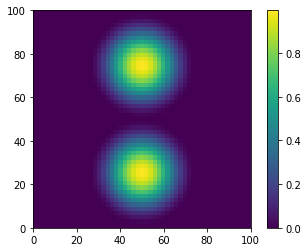

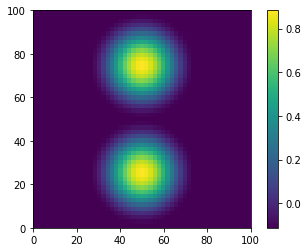

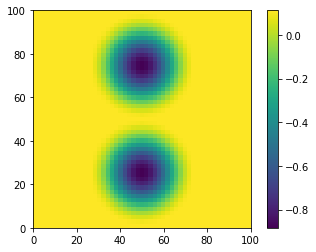

In [230]:
#unpacking:
newarray = []
with open('Normalized_vorticity.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\t')
    for row in readCSV:
        newarray +=[converter(unpack(row[0]))]

        
VORT_R = np.array(newarray, dtype = float)
        
        
def unpack(string):
    result = []
    temp = ""
    i = 0
    while (i < len(string)):
        if string[i] == '.':
            if (string[i-2]=='-'):
                temp+="-0."
            else:
                temp+="0."
            for k in range(1,7):
                temp+=string[i+k]
            result+=[temp]
        temp =""
        i+=1
    return result


def converter(array):
    newarr= []
    for i in array:
        newarr+= [float(i)]
    return(newarr)


    

def twoDSum (array):
    newarr = []
    for i in array:
        newarr+=[math.fsum(i)]
    return (math.fsum(newarr))




# from numpy import math
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
np.core
from sys import maxsize
from numpy import set_printoptions
set_printoptions(threshold=maxsize)

print("hi")
#*****************Constants********************#
Lx = 100
Nx = 51
Ly = 100
Ny = 51
dx = 2.0 #2
dy = 2.0 #2


A= 1
r = 25.0
tol = 10**-7

x_int_1 = 50.0
y_int_1 = 25.0
x_int_2 = 50.0
y_int_2 = 75.0



VORT = np.zeros((Nx+2, Ny+2), dtype = float)

for i in range(1,Nx+1): #51 physical node
    for j in range(1,Ny+1):
        d_1 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_1)**2 + ((j-1)*dy - y_int_1)**2)))
        d_2 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_2)**2 + ((j-1)*dy - y_int_2)**2))) 
        VORT[i][j] = 0.5*A*(math.cos(d_1*math.pi)+1) + 0.5*A*(math.cos(d_2*math.pi)+1)

#Boundary Condition
for j in range(1,Ny+1):
    VORT[Nx+1][j] = VORT[2][j]
    VORT[0][j] = VORT[Nx-1][j]
    VORT[1][j] = VORT[Nx][j]
for i in range(1,Nx+1):
    VORT[i][Ny+1] = VORT[i][2]
    VORT[i][0] = VORT[i][Ny-1]
    VORT[i][1] = VORT[i][Ny]
print("finish VORT initialize")



#print(VORT[1:-1,1:-1])


plt.figure(0)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()

VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)

VORT_loop_counter = 0


        #AVERGING
while (VORT_Avg >  tol):
    for i in range(0,Nx+2):
        for j in range(0,Ny+2):
            VORT[i][j] = VORT[i][j] - VORT_Avg
            
    VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)
    VORT_loop_counter+=1
  
print("VORT loop counter", VORT_loop_counter)

print("mean vorticity = ", VORT_Avg)





#print(data)
#result = numpy.array(x).astype("float")
#print("this is x" , x)

plt.figure(1)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()

#VORT = np.transpose(VORT_R)

#print(VORT)

#*****************Advancing Lists********************#
PHI = np.zeros((Nx+2, Ny+2), dtype = float)
Residual = np.zeros((Nx+2, Ny+2), dtype = float)

#Initial residual:             #####UPDATE PHYSICAL ONLY???##########
for i in range( 0,Nx+2): 
    for j in range(0,Ny+2):
        Residual[i][j] =  -(VORT[i][j])

plt.figure(100)
plt.imshow( np.transpose(Residual[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()



"""
for a in range(0,Ny+2):
    Residual[Nx+1][a] = Residual[2][a]
    Residual[0][a] = Residual[Nx-1][a]
    Residual[1][a] = Residual[Nx][a]
for b in range(0,Nx+2):
    Residual[b][Ny+1] = Residual[b][2]
    Residual[b][0] = Residual[b][Ny-1]
    Residual[b][1] = Residual[b][Ny]

"""    
  
print("finish Residual initialization")

"""
PHI[0][0] = -999.0
PHI[0][52] = -999.0
PHI[52][52] = -999.0
PHI[52][0] = -999.0

Residual[0][0] = -999.0
Residual[0][52] = -999.0
Residual[52][52] = -999.0
Residual[52][0] = -999.0
"""
#test #print(u_cur.shape)
#result = 53x53

###########################Criterion for Convergence#######################

EPS = np.amax(np.absolute(Residual))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[1:-1,1:-1])))+ np.amax(np.absolute(VORT)))
print("This is initial EPS = " ,EPS)

########################### ALPHA #######################   

beta = dx/dy
sigma = (1/(1+beta**2))*(math.cos(3.141592654/Nx) + math.cos(3.141592654/Ny)*beta**2)
alpha = 2/(1+math.sqrt(1-sigma**2))
print("sigma =", sigma)    
print("alpha =", alpha)
    
    
    
#***************MAIN LOOP*********************#
maincounter = 0
print("entering main loop")

while (maincounter< 5000):

    for j in range(1,Ny+1):  
        
        #update ghost nodes along phi[i][Ny+1]
        if (j == Ny):  #IMPORTANT , NY-1 for wall
            for z in range(0,Nx+2): 
                PHI[z][Ny+1] = PHI[z][2]
        #update finish
        
        for i in range(1,Nx+1): #51 physical node WALL
            
            #update ghost nodes along phi[Nx+1][j]
            if (i == Nx):
                for k in range(0,Ny+2):
                    PHI[Nx+1][j] = PHI[2][k]
            #update finish

            Residual[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j]) + (1/dy**2)*(PHI[i][j-1] -2*PHI[i][j] + PHI[i][j+1]) - VORT[i][j]
            
            PHI[i][j] = PHI[i][j] + (alpha*Residual[i][j])/(2*((1/dx**2)+(1/dy**2)))
        
        #Update ghosts at PHI[0][j]
        for k in range(0,Ny+2):
            PHI[0][k] = PHI[Nx-1][k]
            PHI[1][k] = PHI[Nx][k] #make sure left right equal
            
    #update finish
    for t in range(0,Nx+2):
        PHI[t][0] = PHI[t][Ny-1]
        PHI[t][1] = PHI[t][Ny] 
    #make sure left right equal
    
    #update finish
    #Update ghosts at PHI[i][0]
    tempResidual = np.copy(Residual)
    tempResidual = np.absolute(tempResidual[2:-1,1:-1])
    
    EPS = np.amax(np.absolute(Residual))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[1:-1,1:-1])))+ np.amax(np.absolute(VORT)))
    print('EPS is', EPS, '  MainCounter =', maincounter, "Max of abs Value = "  , np.amax(np.absolute(Residual)))
    print(" Index of max abs = ", np.unravel_index(tempResidual.argmax(), tempResidual.shape))
    maincounter +=1
        
"""
    
"""  
        
#print(EPS)        
  
 
    
#print((PHI[1:-1,1:-1]))
    
    
plt.figure(4)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.imshow( np.transpose(PHI[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()


#NUMERICAL VORTICITY
VORT_NUM = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1, Nx+1):
    for j in range(1,Ny+1):
        VORT_NUM[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j])+(1/dy**2)*(PHI[i][j-1]-2*PHI[i][j]+ PHI[i][j+1])
        
plt.figure(5)


x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
                            #URN
plt.imshow( np.transpose(VORT_NUM[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()


#quiver plot

U = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        U[i][j] = (PHI[i][j-1]-PHI[i][j+1])/(2*dy)
    
V = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        V[i][j] = (PHI[i+1][j]-PHI[i-1][j])/(2*dx)

x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)   
                            #URN
plt.quiver(X, Y, np.transpose(U[1:-1,1:-1]), np.transpose(V[1:-1,1:-1]))        



plt.savefig('quiver.svg', dpi = 300)



plt.figure(10)
VORT_DIFF = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        VORT_DIFF[i][j]=VORT_NUM[i][j]-VORT[i][j]
        
plt.imshow( np.transpose(VORT_DIFF[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()




In [16]:
def forceEqual(array): #left right symmetry
    finarr = np.transpose(array)
    i = 0
    while (i != 26):
        array[i] = array[52-i]
        i+=1
    return np.transpose(finarr)

        
        
        

(49, 3)


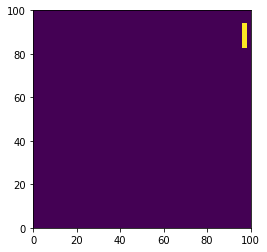

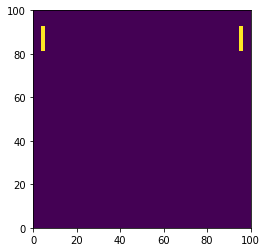

In [170]:
Hihi1 = np.zeros((53,53))
Hihi1[50,4] = 475
Hihi1[50,5:10] = 475
plt.imshow( np.transpose(Hihi1[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
print(np.unravel_index(Hihi1[1:-1,1:-1].argmax(),Hihi1[1:-1,1:-1].shape))

plt.figure(475)
plt.imshow(np.transpose(forceEqual(Hihi1)), interpolation='none', extent=[0,100,0,100])

hi
finish VORT initialize
VORT loop counter 1
mean vorticity =  -1.0799170520190873e-17
finish Residual initialization
This is initial EPS =  1.0
sigma = 0.998103328736549
alpha = 1.8840181363390607
entering main loop
EPS is 0.0013908002760558722   MainCounter = 0 Max of abs Value =  3.170851416751962
 Index of max abs =  (26, 14)
EPS is 0.000661458596063461   MainCounter = 1 Max of abs Value =  2.9035507306146933
 Index of max abs =  (26, 14)
EPS is 0.0004168345130175382   MainCounter = 2 Max of abs Value =  2.6614985621648812
 Index of max abs =  (26, 13)
EPS is 0.0002963634442925199   MainCounter = 3 Max of abs Value =  2.452637363863866
 Index of max abs =  (26, 13)
EPS is 0.00022448631891312627   MainCounter = 4 Max of abs Value =  2.2619055228379175
 Index of max abs =  (26, 13)
EPS is 0.00017703663127172092   MainCounter = 5 Max of abs Value =  2.0878814799358683
 Index of max abs =  (26, 13)
EPS is 0.0001438343964857148   MainCounter = 6 Max of abs Value =  1.9322628850248023
 

EPS is 3.2435114558792656e-06   MainCounter = 70 Max of abs Value =  0.1792385876457277
 Index of max abs =  (23, 27)
EPS is 3.161544781110144e-06   MainCounter = 71 Max of abs Value =  0.17533838878033087
 Index of max abs =  (23, 27)
EPS is 3.0820975278442332e-06   MainCounter = 72 Max of abs Value =  0.1715269344806008
 Index of max abs =  (23, 27)
EPS is 3.00507515293017e-06   MainCounter = 73 Max of abs Value =  0.16780353350339017
 Index of max abs =  (23, 26)
EPS is 2.931394239914216e-06   MainCounter = 74 Max of abs Value =  0.16422176131744337
 Index of max abs =  (23, 26)
EPS is 2.859884623290971e-06   MainCounter = 75 Max of abs Value =  0.16071964568607566
 Index of max abs =  (23, 26)
EPS is 2.7904645271399425e-06   MainCounter = 76 Max of abs Value =  0.15729588901276703
 Index of max abs =  (23, 26)
EPS is 2.723078890762247e-06   MainCounter = 77 Max of abs Value =  0.15394918190866946
 Index of max abs =  (23, 26)
EPS is 2.6576622201536625e-06   MainCounter = 78 Max of 

EPS is 7.652703690135084e-07   MainCounter = 142 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 7.541003298578285e-07   MainCounter = 143 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 7.431805043740308e-07   MainCounter = 144 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 7.325033732560872e-07   MainCounter = 145 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 7.220628019591791e-07   MainCounter = 146 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 7.118534907934369e-07   MainCounter = 147 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 7.018695206709724e-07   MainCounter = 148 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 6.921046070363886e-07   MainCounter = 149 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 6.825536591938845e-07   MainCounter = 150 Max of abs Valu

EPS is 3.280449123097393e-07   MainCounter = 220 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.2541077522878916e-07   MainCounter = 221 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.2281098458471297e-07   MainCounter = 222 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.2024480033646124e-07   MainCounter = 223 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.1771156182372504e-07   MainCounter = 224 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.15210583427601e-07   MainCounter = 225 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.1274134670830287e-07   MainCounter = 226 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.103029432766367e-07   MainCounter = 227 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 3.078949732632781e-07   MainCounter = 228 Max of abs 

EPS is 1.9747260333217218e-07   MainCounter = 292 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.9620968780099664e-07   MainCounter = 293 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.9495663833228298e-07   MainCounter = 294 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.9371333436516385e-07   MainCounter = 295 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.9247965761874403e-07   MainCounter = 296 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.9125549204150468e-07   MainCounter = 297 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.9004072376149252e-07   MainCounter = 298 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.8883524103793605e-07   MainCounter = 299 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.8763893421368e-07   MainCounter = 300 Max of ab

 Index of max abs =  (0, 0)
EPS is 1.2633851412992807e-07   MainCounter = 364 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2557406274683416e-07   MainCounter = 365 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2481448766566333e-07   MainCounter = 366 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2405975084730284e-07   MainCounter = 367 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2330981472613178e-07   MainCounter = 368 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2256464220062066e-07   MainCounter = 369 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2182445957124978e-07   MainCounter = 370 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2108905574692368e-07   MainCounter = 371 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
EPS is 1.2035830047171826e-0

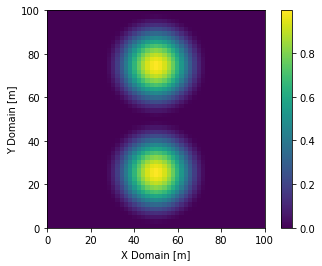

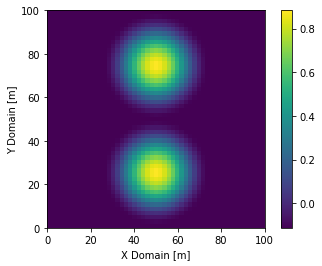

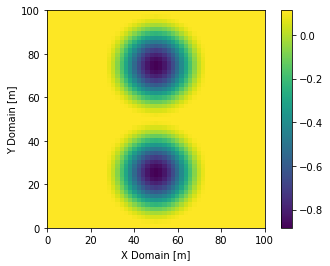

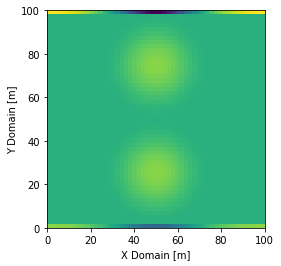

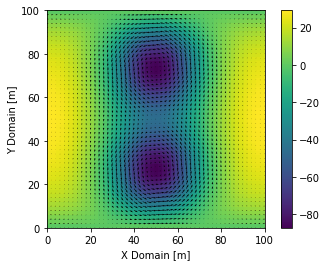

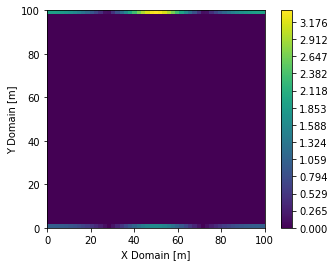

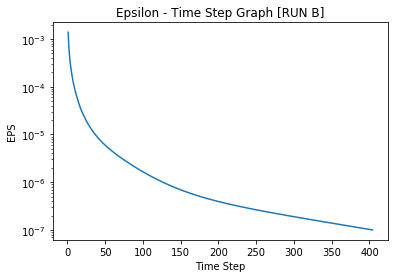

In [1]:
#unpacking:


        
def unpack(string):
    result = []
    temp = ""
    i = 0
    while (i < len(string)):
        if string[i] == '.':
            if (string[i-2]=='-'):
                temp+="-0."
            else:
                temp+="0."
            for k in range(1,7):
                temp+=string[i+k]
            result+=[temp]
        temp =""
        i+=1
    return result


def converter(array):
    newarr= []
    for i in array:
        newarr+= [float(i)]
    return(newarr)


    

def twoDSum (array):
    newarr = []
    for i in array:
        newarr+=[math.fsum(i)]
    return (math.fsum(newarr))




# from numpy import math
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
np.core
from sys import maxsize
from numpy import set_printoptions
set_printoptions(threshold=maxsize)

print("hi")
#*****************Constants********************#
Lx = 100
Nx = 51
Ly = 100
Ny = 51
dx = 2.0 #2
dy = 2.0 #2


A= 1
r = 25.0
tol = 10**-7

x_int_1 = 50.0
y_int_1 = 25.0
x_int_2 = 50.0
y_int_2 = 75.0



VORT = np.zeros((Nx+2, Ny+2), dtype = float)

for i in range(1,Nx+1): #51 physical node
    for j in range(1,Ny+1):
        d_1 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_1)**2 + ((j-1)*dy - y_int_1)**2)))
        d_2 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_2)**2 + ((j-1)*dy - y_int_2)**2))) 
        VORT[i][j] = 0.5*A*(math.cos(d_1*math.pi)+1) + 0.5*A*(math.cos(d_2*math.pi)+1)

#Boundary Condition
for j in range(0,Ny+2):
    VORT[Nx+1][j] = 0
    VORT[0][j] = 0
    VORT[1][j] = VORT[Nx][j]
for i in range(0,Nx+2):
    VORT[i][Ny+1] = VORT[i][2]
    VORT[i][0] = VORT[i][Ny-1]
    VORT[i][1] = VORT[i][Ny]
print("finish VORT initialize")



#print(VORT[1:-1,1:-1])


plt.figure(0)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()

plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.savefig("INT,UNNORM-VORT-run_B.svg")
VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)

VORT_loop_counter = 0


        #AVERGING
while (VORT_Avg >  tol):
    for i in range(0,Nx+2):
        for j in range(0,Ny+2):
            VORT[i][j] = VORT[i][j] - VORT_Avg
            
    VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)
    VORT_loop_counter+=1
 
print("VORT loop counter", VORT_loop_counter)

print("mean vorticity = ", VORT_Avg)





#print(data)
#result = numpy.array(x).astype("float")
#print("this is x" , x)

plt.figure(1)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()

plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.savefig("INT,NORM-VORT-run_B.svg")
#VORT = np.transpose(VORT_R)

#print(VORT)

#*****************Advancing Lists********************#
PHI = np.zeros((Nx+2, Ny+2), dtype = float)
Residual = np.zeros((Nx+2, Ny+2), dtype = float)

#Initial residual:             #####UPDATE PHYSICAL ONLY???##########
for i in range( 0,Nx+2): 
    for j in range(0,Ny+2):
        Residual[i][j] =  -(VORT[i][j])

plt.figure(100)
plt.imshow( np.transpose(Residual[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")




"""
for a in range(0,Ny+2):
    Residual[Nx+1][a] = Residual[2][a]
    Residual[0][a] = Residual[Nx-1][a]
    Residual[1][a] = Residual[Nx][a]
for b in range(0,Nx+2):
    Residual[b][Ny+1] = Residual[b][2]
    Residual[b][0] = Residual[b][Ny-1]
    Residual[b][1] = Residual[b][Ny]

"""    
  
print("finish Residual initialization")

"""
PHI[0][0] = -999.0
PHI[0][52] = -999.0
PHI[52][52] = -999.0
PHI[52][0] = -999.0

Residual[0][0] = -999.0
Residual[0][52] = -999.0
Residual[52][52] = -999.0
Residual[52][0] = -999.0
"""
#test #print(u_cur.shape)
#result = 53x53

###########################Criterion for Convergence#######################

EPS = np.amax(np.absolute(Residual))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[1:-1,1:-1])))+ np.amax(np.absolute(VORT)))
print("This is initial EPS = " ,EPS)

########################### ALPHA #######################   

beta = dx/dy
sigma = (1/(1+beta**2))*(math.cos(3.141592654/Nx) + math.cos(3.141592654/Ny)*beta**2)
alpha = 2/(1+math.sqrt(1-sigma**2))
print("sigma =", sigma)    
print("alpha =", alpha)
alpha = 1.5
timeStep = []
EPScounter = []

#***************MAIN LOOP*********************#
maincounter = 0
print("entering main loop")

while (EPS > tol):

    for j in range(2,Ny):  
        
        #update ghost nodes along phi[i][Ny+1]
        if (j == Ny):  #IMPORTANT , NY-1 for wall
            for z in range(0,Nx+2): 
                PHI[z][Ny+1] = PHI[z][2]
        #update finish
        
        for i in range(1,Nx+1): #51 physical node WALL
            
            #update ghost nodes along phi[Nx+1][j]
            if (i == Nx):
                for k in range(0,Ny+2):
                    PHI[Nx+1][k] = PHI[2][k]
            #update finish

            Residual[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j]) + (1/dy**2)*(PHI[i][j-1] -2*PHI[i][j] + PHI[i][j+1]) - VORT[i][j]
            
            PHI[i][j] = PHI[i][j] + (alpha*Residual[i][j])/(2*((1/dx**2)+(1/dy**2)))
        
        #Update ghosts at PHI[0][j]
        for k in range(0,Ny+2):
            PHI[0][k] = PHI[Nx-1][k]
            PHI[1][k] = PHI[Nx][k] #make sure left right equal
            
    #update finish
    for t in range(0,Nx+2):
        PHI[t][0] = PHI[t][Ny-1]
        PHI[t][1] = PHI[t][Ny] 
    #make sure left right equal
    
    #update finish
    #Update ghosts at PHI[i][0]
    tempResidual = np.copy(Residual)
    tempResidual = np.absolute(tempResidual[1:-1,1:-1])
    
    EPS = np.amax(np.absolute(Residual[1:-1,2:-2]))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[1:-1,2:-2])))+ np.amax(np.absolute(VORT[1:-1,2:-2])))
    print('EPS is', EPS, '  MainCounter =', maincounter, "Max of abs Value = "  , np.amax(np.absolute(Residual[1:-1,1:-1])))
    print(" Index of max abs = ", np.unravel_index(tempResidual.argmax(), tempResidual.shape))
    maincounter +=1
    timeStep += [maincounter]
    EPScounter +=[EPS]

#URN
#PHI = forceEqual(PHI)
#PHI = np.transpose(forceEqual(np.transpose(PHI)))
"""
    
"""  
        
#print(EPS)        
  
 
    
#print((PHI[1:-1,1:-1]))
    
    


#NUMERICAL VORTICITY
VORT_NUM = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1, Nx+1):
    for j in range(1,Ny+1):
        VORT_NUM[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j])+(1/dy**2)*(PHI[i][j-1]-2*PHI[i][j]+ PHI[i][j+1])
        
plt.figure(5)


x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
X,Y = np.meshgrid(x,y)
                            #URN
plt.imshow( np.transpose(VORT_NUM[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])

plt.savefig("NumVort_RUN_B.svg", dpi = 300)


#quiver plot

U = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        U[i][j] = (PHI[i][j-1]-PHI[i][j+1])/(2*dy)
    
V = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        V[i][j] = (PHI[i+1][j]-PHI[i-1][j])/(2*dx)



plt.figure(4)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.imshow( np.transpose(PHI[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()#URN
plt.quiver(X, Y, np.transpose(U[1:-1,1:-1]), np.transpose(V[1:-1,1:-1]))        
plt.savefig('quiverB.svg', dpi = 300)



plt.figure(10)
VORT_DIFF = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        VORT_DIFF[i][j]=VORT_NUM[i][j]-VORT[i][j]
        
plt.imshow( np.transpose(np.absolute(VORT_DIFF[1:-1,1:-1])), interpolation='none', extent=[0,100,0,100])
plt.colorbar(ticks = np.linspace(0,4.5,18,endpoint=True))
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.savefig('numdiff_RUNB.svg', dpi = 300)
print(VORT_DIFF)

plt.figure(11)
plt.plot(timeStep, EPScounter)
plt.xscale("linear")
plt.xlabel("Time Step")
plt.ylabel("EPS")
plt.yscale("log")
plt.title("Epsilon - Time Step Graph [RUN B]")

plt.savefig("EPS-TIME_RUNB.svg")


hi
finish VORT initialize
VORT loop counter 1
mean vorticity =  -1.0799170520190873e-17
finish Residual initialization
This is initial EPS =  1.0
sigma = 0.998103328736549
alpha = 1.8840181363390607
entering main loop
EPS is 0.0008921662715651936   MainCounter = 0 Max of abs Value =  7.408401704039414
 Index of max abs =  (29, 16)
EPS is 0.0004212900368222065   MainCounter = 1 Max of abs Value =  6.203460643621942
 Index of max abs =  (28, 15)
EPS is 0.00023898293665967985   MainCounter = 2 Max of abs Value =  5.181010801239616
 Index of max abs =  (28, 39)
EPS is 0.0001693317992826106   MainCounter = 3 Max of abs Value =  4.63461912442075
 Index of max abs =  (27, 38)
EPS is 0.00012388022910225582   MainCounter = 4 Max of abs Value =  4.134149075457217
 Index of max abs =  (27, 37)
EPS is 9.79783983374147e-05   MainCounter = 5 Max of abs Value =  3.7463050785719334
 Index of max abs =  (26, 37)
EPS is 7.745908907169085e-05   MainCounter = 6 Max of abs Value =  3.358779650883791
 Index

EPS is 2.723650042185898e-06   MainCounter = 72 Max of abs Value =  0.22923519566157907
 Index of max abs =  (44, 50)
EPS is 2.871829351678513e-06   MainCounter = 73 Max of abs Value =  0.24163349468619572
 Index of max abs =  (50, 0)
EPS is 2.5254624698550903e-06   MainCounter = 74 Max of abs Value =  0.21236809045946586
 Index of max abs =  (42, 50)
EPS is 2.6049144741378275e-06   MainCounter = 75 Max of abs Value =  0.21900205717444216
 Index of max abs =  (50, 0)
EPS is 2.3399217176811264e-06   MainCounter = 76 Max of abs Value =  0.19663460393223625
 Index of max abs =  (40, 50)
EPS is 2.3599937034690928e-06   MainCounter = 77 Max of abs Value =  0.19829207236816465
 Index of max abs =  (50, 0)
EPS is 2.169449136328155e-06   MainCounter = 78 Max of abs Value =  0.1822208619295796
 Index of max abs =  (38, 50)
EPS is 2.1435614185326534e-06   MainCounter = 79 Max of abs Value =  0.18003078609100548
 Index of max abs =  (50, 0)
EPS is 2.0175741650341902e-06   MainCounter = 80 Max of 

EPS is 1.344656042577337e-06   MainCounter = 144 Max of abs Value =  0.11532853393601211
 Index of max abs =  (50, 0)
EPS is 1.3078021484968273e-06   MainCounter = 145 Max of abs Value =  0.09819984160591716
 Index of max abs =  (24, 50)
EPS is 1.312185917547079e-06   MainCounter = 146 Max of abs Value =  0.11268815634148005
 Index of max abs =  (50, 0)
EPS is 1.3061090819800744e-06   MainCounter = 147 Max of abs Value =  0.09519479042642637
 Index of max abs =  (22, 50)
EPS is 1.3052348685606639e-06   MainCounter = 148 Max of abs Value =  0.11032909463017354
 Index of max abs =  (50, 0)
EPS is 1.3043821950647968e-06   MainCounter = 149 Max of abs Value =  0.09236094000163192
 Index of max abs =  (20, 50)
EPS is 1.303505249914112e-06   MainCounter = 150 Max of abs Value =  0.10712734914345873
 Index of max abs =  (50, 0)
EPS is 1.3026285406412698e-06   MainCounter = 151 Max of abs Value =  0.09600224673429864
 Index of max abs =  (50, 0)
EPS is 1.3017542360627338e-06   MainCounter = 15

EPS is 1.4012287636252186e-06   MainCounter = 224 Max of abs Value =  0.12955829689206716
 Index of max abs =  (50, 0)
EPS is 1.212334424561471e-06   MainCounter = 225 Max of abs Value =  0.1015116738647826
 Index of max abs =  (1, 50)
EPS is 1.3908523105152884e-06   MainCounter = 226 Max of abs Value =  0.12893177170730657
 Index of max abs =  (50, 0)
EPS is 1.2091713576625112e-06   MainCounter = 227 Max of abs Value =  0.1003129421385674
 Index of max abs =  (1, 50)
EPS is 1.3753186488375064e-06   MainCounter = 228 Max of abs Value =  0.1278288702590626
 Index of max abs =  (50, 0)
EPS is 1.205952471637073e-06   MainCounter = 229 Max of abs Value =  0.09871228997156095
 Index of max abs =  (1, 50)
EPS is 1.3559789859357246e-06   MainCounter = 230 Max of abs Value =  0.12636884729948056
 Index of max abs =  (50, 0)
EPS is 1.202714673902931e-06   MainCounter = 231 Max of abs Value =  0.09683245484797715
 Index of max abs =  (1, 50)
EPS is 1.3340404297747405e-06   MainCounter = 232 Max 

EPS is 1.0841301706423333e-06   MainCounter = 294 Max of abs Value =  0.09043909163514269
 Index of max abs =  (50, 0)
EPS is 1.0819932031794143e-06   MainCounter = 295 Max of abs Value =  0.10976141532182199
 Index of max abs =  (50, 0)
EPS is 1.0798210334370393e-06   MainCounter = 296 Max of abs Value =  0.0913636336516856
 Index of max abs =  (50, 0)
EPS is 1.077674314987358e-06   MainCounter = 297 Max of abs Value =  0.10884562750876031
 Index of max abs =  (50, 0)
EPS is 1.0755092654955365e-06   MainCounter = 298 Max of abs Value =  0.0922714669499966
 Index of max abs =  (50, 0)
EPS is 1.0733698825305486e-06   MainCounter = 299 Max of abs Value =  0.10794264332186104
 Index of max abs =  (50, 0)
EPS is 1.0711886320184772e-06   MainCounter = 300 Max of abs Value =  0.09317452856079517
 Index of max abs =  (50, 0)
EPS is 1.0690035367250672e-06   MainCounter = 301 Max of abs Value =  0.10703337299858501
 Index of max abs =  (50, 0)
EPS is 1.0667796954512537e-06   MainCounter = 302 M

EPS is 9.037215037878527e-07   MainCounter = 365 Max of abs Value =  0.09950421671960757
 Index of max abs =  (50, 0)
EPS is 9.012345082267983e-07   MainCounter = 366 Max of abs Value =  0.10080320833367112
 Index of max abs =  (50, 0)
EPS is 8.98758429982825e-07   MainCounter = 367 Max of abs Value =  0.10021909392058709
 Index of max abs =  (50, 0)
EPS is 8.962961232420066e-07   MainCounter = 368 Max of abs Value =  0.10009096084880903
 Index of max abs =  (50, 0)
EPS is 8.938495487720092e-07   MainCounter = 369 Max of abs Value =  0.10092408296352023
 Index of max abs =  (50, 0)
EPS is 8.914116017634559e-07   MainCounter = 370 Max of abs Value =  0.09939784363496201
 Index of max abs =  (50, 0)
EPS is 8.889939462809072e-07   MainCounter = 371 Max of abs Value =  0.1016008310536955
 Index of max abs =  (50, 0)
EPS is 8.865800973618351e-07   MainCounter = 372 Max of abs Value =  0.0987417596467019
 Index of max abs =  (50, 0)
EPS is 8.84190731388062e-07   MainCounter = 373 Max of abs 

EPS is 7.573124792673699e-07   MainCounter = 435 Max of abs Value =  0.09840804066027115
 Index of max abs =  (50, 0)
EPS is 7.555688161889614e-07   MainCounter = 436 Max of abs Value =  0.10233844472849046
 Index of max abs =  (50, 0)
EPS is 7.538230654506595e-07   MainCounter = 437 Max of abs Value =  0.09825525278671904
 Index of max abs =  (50, 0)
EPS is 7.520957599515321e-07   MainCounter = 438 Max of abs Value =  0.10247077622602946
 Index of max abs =  (50, 0)
EPS is 7.50365709873556e-07   MainCounter = 439 Max of abs Value =  0.09814305419428532
 Index of max abs =  (50, 0)
EPS is 7.486544375497063e-07   MainCounter = 440 Max of abs Value =  0.10256329626852428
 Index of max abs =  (50, 0)
EPS is 7.469399704708318e-07   MainCounter = 441 Max of abs Value =  0.09806964134056256
 Index of max abs =  (50, 0)
EPS is 7.452444188642499e-07   MainCounter = 442 Max of abs Value =  0.10261827603753554
 Index of max abs =  (50, 0)
EPS is 7.435454122352807e-07   MainCounter = 443 Max of a

EPS is 6.517321554361087e-07   MainCounter = 505 Max of abs Value =  0.10153208088463866
 Index of max abs =  (50, 0)
EPS is 6.504344703738633e-07   MainCounter = 506 Max of abs Value =  0.09915261822921412
 Index of max abs =  (50, 0)
EPS is 6.491463057347625e-07   MainCounter = 507 Max of abs Value =  0.10148963585225651
 Index of max abs =  (50, 0)
EPS is 6.478589736569828e-07   MainCounter = 508 Max of abs Value =  0.09920083402823326
 Index of max abs =  (50, 0)
EPS is 6.465808840024272e-07   MainCounter = 509 Max of abs Value =  0.10143584814339718
 Index of max abs =  (50, 0)
EPS is 6.453038027395504e-07   MainCounter = 510 Max of abs Value =  0.09926001414713109
 Index of max abs =  (50, 0)
EPS is 6.440356497883671e-07   MainCounter = 511 Max of abs Value =  0.10137144173478813
 Index of max abs =  (50, 0)
EPS is 6.427687173240329e-07   MainCounter = 512 Max of abs Value =  0.09932948744316267
 Index of max abs =  (50, 0)
EPS is 6.415103663513373e-07   MainCounter = 513 Max of 

EPS is 5.621590124897635e-07   MainCounter = 585 Max of abs Value =  0.10029898994383352
 Index of max abs =  (50, 0)
EPS is 5.611949172234611e-07   MainCounter = 586 Max of abs Value =  0.10033627246432303
 Index of max abs =  (50, 0)
EPS is 5.602341295852492e-07   MainCounter = 587 Max of abs Value =  0.10035769619014218
 Index of max abs =  (50, 0)
EPS is 5.592765402877409e-07   MainCounter = 588 Max of abs Value =  0.10027898981907185
 Index of max abs =  (50, 0)
EPS is 5.583223814937414e-07   MainCounter = 589 Max of abs Value =  0.1004133547238601
 Index of max abs =  (50, 0)
EPS is 5.57371236549904e-07   MainCounter = 590 Max of abs Value =  0.10022514184937442
 Index of max abs =  (50, 0)
EPS is 5.564236337348747e-07   MainCounter = 591 Max of abs Value =  0.10046522088998117
 Index of max abs =  (50, 0)
EPS is 5.554788732810096e-07   MainCounter = 592 Max of abs Value =  0.10017541257827695
 Index of max abs =  (50, 0)
EPS is 5.545377537427264e-07   MainCounter = 593 Max of ab

EPS is 4.98752821256933e-07   MainCounter = 659 Max of abs Value =  0.10014314854464906
 Index of max abs =  (50, 0)
EPS is 4.97993992242569e-07   MainCounter = 660 Max of abs Value =  0.1005256630667683
 Index of max abs =  (50, 0)
EPS is 4.97237046725228e-07   MainCounter = 661 Max of abs Value =  0.1001361286347921
 Index of max abs =  (50, 0)
EPS is 4.964828261138305e-07   MainCounter = 662 Max of abs Value =  0.10053126739954038
 Index of max abs =  (50, 0)
EPS is 4.957304590684155e-07   MainCounter = 663 Max of abs Value =  0.10013192083401051
 Index of max abs =  (50, 0)
EPS is 4.949808020336158e-07   MainCounter = 664 Max of abs Value =  0.10053409994889456
 Index of max abs =  (50, 0)
EPS is 4.942329749724578e-07   MainCounter = 665 Max of abs Value =  0.10013044021606404
 Index of max abs =  (50, 0)
EPS is 4.934878373430429e-07   MainCounter = 666 Max of abs Value =  0.10053425387131426
 Index of max abs =  (50, 0)
EPS is 4.92744512118886e-07   MainCounter = 667 Max of abs Va

EPS is 4.475871702857003e-07   MainCounter = 734 Max of abs Value =  0.10025336204095175
 Index of max abs =  (50, 0)
EPS is 4.469758501141267e-07   MainCounter = 735 Max of abs Value =  0.10040746560661112
 Index of max abs =  (50, 0)
EPS is 4.4636606760790524e-07   MainCounter = 736 Max of abs Value =  0.10026176810405424
 Index of max abs =  (50, 0)
EPS is 4.457580686561859e-07   MainCounter = 737 Max of abs Value =  0.10039873713714215
 Index of max abs =  (50, 0)
EPS is 4.451516098594454e-07   MainCounter = 738 Max of abs Value =  0.1002707822229047
 Index of max abs =  (50, 0)
EPS is 4.445469046117439e-07   MainCounter = 739 Max of abs Value =  0.10038947476899679
 Index of max abs =  (50, 0)
EPS is 4.439437428824539e-07   MainCounter = 740 Max of abs Value =  0.10028025497812848
 Index of max abs =  (50, 0)
EPS is 4.433423042540575e-07   MainCounter = 741 Max of abs Value =  0.10037982976106669
 Index of max abs =  (50, 0)
EPS is 4.427424131049392e-07   MainCounter = 742 Max of 

EPS is 4.0847634921983735e-07   MainCounter = 804 Max of abs Value =  0.10033645770529936
 Index of max abs =  (50, 0)
EPS is 4.079670792088808e-07   MainCounter = 805 Max of abs Value =  0.10033104205994853
 Index of max abs =  (50, 0)
EPS is 4.0745907881206363e-07   MainCounter = 806 Max of abs Value =  0.10033140277724278
 Index of max abs =  (50, 0)
EPS is 4.069523442707687e-07   MainCounter = 807 Max of abs Value =  0.1003359825889531
 Index of max abs =  (50, 0)
EPS is 4.0644686273264193e-07   MainCounter = 808 Max of abs Value =  0.10032659082277945
 Index of max abs =  (50, 0)
EPS is 4.0594264460071206e-07   MainCounter = 809 Max of abs Value =  0.10034065268724163
 Index of max abs =  (50, 0)
EPS is 4.0543966342506417e-07   MainCounter = 810 Max of abs Value =  0.10032207495103179
 Index of max abs =  (50, 0)
EPS is 4.049379427952405e-07   MainCounter = 811 Max of abs Value =  0.10034500288292442
 Index of max abs =  (50, 0)
EPS is 4.0443744370136814e-07   MainCounter = 812 Ma

EPS is 3.7180983093848515e-07   MainCounter = 883 Max of abs Value =  0.10031477754292822
 Index of max abs =  (50, 0)
EPS is 3.7138785064726486e-07   MainCounter = 884 Max of abs Value =  0.10035023562931883
 Index of max abs =  (50, 0)
EPS is 3.7096680558613737e-07   MainCounter = 885 Max of abs Value =  0.10031470320985164
 Index of max abs =  (50, 0)
EPS is 3.705467355966502e-07   MainCounter = 886 Max of abs Value =  0.10035018927448774
 Index of max abs =  (50, 0)
EPS is 3.701275945349233e-07   MainCounter = 887 Max of abs Value =  0.10031486763955172
 Index of max abs =  (50, 0)
EPS is 3.6970942176301846e-07   MainCounter = 888 Max of abs Value =  0.10034990972137464
 Index of max abs =  (50, 0)
EPS is 3.692921719527053e-07   MainCounter = 889 Max of abs Value =  0.10031525903760169
 Index of max abs =  (50, 0)
EPS is 3.6887588344045427e-07   MainCounter = 890 Max of abs Value =  0.10034941007127557
 Index of max abs =  (50, 0)
EPS is 3.684605122393233e-07   MainCounter = 891 Ma

EPS is 3.4441576284395577e-07   MainCounter = 953 Max of abs Value =  0.10033953706213822
 Index of max abs =  (50, 0)
EPS is 3.440536298129455e-07   MainCounter = 954 Max of abs Value =  0.10032576392963705
 Index of max abs =  (50, 0)
EPS is 3.4369226440166666e-07   MainCounter = 955 Max of abs Value =  0.10033881127060112
 Index of max abs =  (50, 0)
EPS is 3.4333165079597957e-07   MainCounter = 956 Max of abs Value =  0.10032651785478336
 Index of max abs =  (50, 0)
EPS is 3.4297179921432434e-07   MainCounter = 957 Max of abs Value =  0.10033803241633293
 Index of max abs =  (50, 0)
EPS is 3.4261269551795605e-07   MainCounter = 958 Max of abs Value =  0.10032731841796888
 Index of max abs =  (50, 0)
EPS is 3.4225434824984627e-07   MainCounter = 959 Max of abs Value =  0.10033721336725904
 Index of max abs =  (50, 0)
EPS is 3.418967450195589e-07   MainCounter = 960 Max of abs Value =  0.10032815273964374
 Index of max abs =  (50, 0)
EPS is 3.415398926350268e-07   MainCounter = 961 M

EPS is 3.1797590761169836e-07   MainCounter = 1032 Max of abs Value =  0.10033110822819807
 Index of max abs =  (50, 0)
EPS is 3.176672191464387e-07   MainCounter = 1033 Max of abs Value =  0.10033400384538055
 Index of max abs =  (50, 0)
EPS is 3.173591280572699e-07   MainCounter = 1034 Max of abs Value =  0.10033078391954348
 Index of max abs =  (50, 0)
EPS is 3.170516355188039e-07   MainCounter = 1035 Max of abs Value =  0.10033431025760237
 Index of max abs =  (50, 0)
EPS is 3.167447366198678e-07   MainCounter = 1036 Max of abs Value =  0.10033049603438954
 Index of max abs =  (50, 0)
EPS is 3.1643843305578694e-07   MainCounter = 1037 Max of abs Value =  0.10033457905900306
 Index of max abs =  (50, 0)
EPS is 3.1613271945689447e-07   MainCounter = 1038 Max of abs Value =  0.10033024679914376
 Index of max abs =  (50, 0)
EPS is 3.158275979676243e-07   MainCounter = 1039 Max of abs Value =  0.10033480831984803
 Index of max abs =  (50, 0)
EPS is 3.155230628323997e-07   MainCounter = 

EPS is 2.9799535417269263e-07   MainCounter = 1101 Max of abs Value =  0.1003309404886798
 Index of max abs =  (50, 0)
EPS is 2.9772422427280434e-07   MainCounter = 1102 Max of abs Value =  0.10033401873303077
 Index of max abs =  (50, 0)
EPS is 2.9745358609168125e-07   MainCounter = 1103 Max of abs Value =  0.1003309186068661
 Index of max abs =  (50, 0)
EPS is 2.971834407053663e-07   MainCounter = 1104 Max of abs Value =  0.10033402969766442
 Index of max abs =  (50, 0)
EPS is 2.9691378435425797e-07   MainCounter = 1105 Max of abs Value =  0.10033091835963986
 Index of max abs =  (50, 0)
EPS is 2.966446181206063e-07   MainCounter = 1106 Max of abs Value =  0.10033401945940085
 Index of max abs =  (50, 0)
EPS is 2.963759382743843e-07   MainCounter = 1107 Max of abs Value =  0.10033093882076954
 Index of max abs =  (50, 0)
EPS is 2.9610774587169923e-07   MainCounter = 1108 Max of abs Value =  0.10033398906727825
 Index of max abs =  (50, 0)
EPS is 2.958400372432667e-07   MainCounter = 

EPS is 2.8013733713791067e-07   MainCounter = 1171 Max of abs Value =  0.10033313333930266
 Index of max abs =  (50, 0)
EPS is 2.7989771581353796e-07   MainCounter = 1172 Max of abs Value =  0.10033184113525934
 Index of max abs =  (50, 0)
EPS is 2.796585044995631e-07   MainCounter = 1173 Max of abs Value =  0.10033307395875951
 Index of max abs =  (50, 0)
EPS is 2.794197013060792e-07   MainCounter = 1174 Max of abs Value =  0.10033190335746539
 Index of max abs =  (50, 0)
EPS is 2.791813059834988e-07   MainCounter = 1175 Max of abs Value =  0.1003330091675258
 Index of max abs =  (50, 0)
EPS is 2.789433167398645e-07   MainCounter = 1176 Max of abs Value =  0.10033197044255132
 Index of max abs =  (50, 0)
EPS is 2.787057332389504e-07   MainCounter = 1177 Max of abs Value =  0.1003329400652872
 Index of max abs =  (50, 0)
EPS is 2.784685537921957e-07   MainCounter = 1178 Max of abs Value =  0.10033204128463197
 Index of max abs =  (50, 0)
EPS is 2.7823177797195407e-07   MainCounter = 11

EPS is 2.638724075242968e-07   MainCounter = 1243 Max of abs Value =  0.10033244341239239
 Index of max abs =  (50, 0)
EPS is 2.636597931659571e-07   MainCounter = 1244 Max of abs Value =  0.10033248263208477
 Index of max abs =  (50, 0)
EPS is 2.6344752115489067e-07   MainCounter = 1245 Max of abs Value =  0.1003324819863613
 Index of max abs =  (50, 0)
EPS is 2.632355906604474e-07   MainCounter = 1246 Max of abs Value =  0.10033244490209142
 Index of max abs =  (50, 0)
EPS is 2.6302400088641695e-07   MainCounter = 1247 Max of abs Value =  0.10033251876420252
 Index of max abs =  (50, 0)
EPS is 2.6281275096230056e-07   MainCounter = 1248 Max of abs Value =  0.1003324091789905
 Index of max abs =  (50, 0)
EPS is 2.6260184014092684e-07   MainCounter = 1249 Max of abs Value =  0.10033255333568775
 Index of max abs =  (50, 0)
EPS is 2.623912675148052e-07   MainCounter = 1250 Max of abs Value =  0.10033237585003135
 Index of max abs =  (50, 0)
EPS is 2.6218103238264265e-07   MainCounter = 

EPS is 2.495827566562248e-07   MainCounter = 1314 Max of abs Value =  0.10033258729606714
 Index of max abs =  (50, 0)
EPS is 2.493925381270652e-07   MainCounter = 1315 Max of abs Value =  0.10033235383892375
 Index of max abs =  (50, 0)
EPS is 2.492026093911937e-07   MainCounter = 1316 Max of abs Value =  0.10033259558674373
 Index of max abs =  (50, 0)
EPS is 2.4901296965405237e-07   MainCounter = 1317 Max of abs Value =  0.1003323465435399
 Index of max abs =  (50, 0)
EPS is 2.4882361839300753e-07   MainCounter = 1318 Max of abs Value =  0.10033260188407084
 Index of max abs =  (50, 0)
EPS is 2.4863455481073486e-07   MainCounter = 1319 Max of abs Value =  0.10033234124355189
 Index of max abs =  (50, 0)
EPS is 2.4844577839427596e-07   MainCounter = 1320 Max of abs Value =  0.10033260619062062
 Index of max abs =  (50, 0)
EPS is 2.482572883457175e-07   MainCounter = 1321 Max of abs Value =  0.10033233792324964
 Index of max abs =  (50, 0)
EPS is 2.48069084159558e-07   MainCounter = 1

EPS is 2.360780203451037e-07   MainCounter = 1389 Max of abs Value =  0.10033253401465586
 Index of max abs =  (50, 0)
EPS is 2.3590782305216624e-07   MainCounter = 1390 Max of abs Value =  0.100332413835646
 Index of max abs =  (50, 0)
EPS is 2.3573787101394182e-07   MainCounter = 1391 Max of abs Value =  0.10033252922397068
 Index of max abs =  (50, 0)
EPS is 2.3556816364483733e-07   MainCounter = 1392 Max of abs Value =  0.1003324189092622
 Index of max abs =  (50, 0)
EPS is 2.3539870047015453e-07   MainCounter = 1393 Max of abs Value =  0.1003325238907648
 Index of max abs =  (50, 0)
EPS is 2.3522948091263548e-07   MainCounter = 1394 Max of abs Value =  0.10033242447833274
 Index of max abs =  (50, 0)
EPS is 2.3506050449509898e-07   MainCounter = 1395 Max of abs Value =  0.10033251810975358
 Index of max abs =  (50, 0)
EPS is 2.348917706490198e-07   MainCounter = 1396 Max of abs Value =  0.10033243044729673
 Index of max abs =  (50, 0)
EPS is 2.3472327889434107e-07   MainCounter = 

EPS is 2.2411311519252197e-07   MainCounter = 1463 Max of abs Value =  0.10033247112712601
 Index of max abs =  (50, 0)
EPS is 2.239597270053495e-07   MainCounter = 1464 Max of abs Value =  0.1003324727137182
 Index of max abs =  (50, 0)
EPS is 2.2380654863957532e-07   MainCounter = 1465 Max of abs Value =  0.10033247446542631
 Index of max abs =  (50, 0)
EPS is 2.2365357966389427e-07   MainCounter = 1466 Max of abs Value =  0.10033246945447999
 Index of max abs =  (50, 0)
EPS is 2.2350081965175256e-07   MainCounter = 1467 Max of abs Value =  0.10033247763633696
 Index of max abs =  (50, 0)
EPS is 2.2334826817138202e-07   MainCounter = 1468 Max of abs Value =  0.10033246638072896
 Index of max abs =  (50, 0)
EPS is 2.2319592480128676e-07   MainCounter = 1469 Max of abs Value =  0.10033248060472871
 Index of max abs =  (50, 0)
EPS is 2.2304378910940817e-07   MainCounter = 1470 Max of abs Value =  0.10033246352535613
 Index of max abs =  (50, 0)
EPS is 2.2289186067909043e-07   MainCounte

EPS is 2.1316356631751716e-07   MainCounter = 1538 Max of abs Value =  0.10033248418630464
 Index of max abs =  (50, 0)
EPS is 2.1302479559315546e-07   MainCounter = 1539 Max of abs Value =  0.10033246115580269
 Index of max abs =  (50, 0)
EPS is 2.128862054369912e-07   MainCounter = 1540 Max of abs Value =  0.10033248451607463
 Index of max abs =  (50, 0)
EPS is 2.1274779548749112e-07   MainCounter = 1541 Max of abs Value =  0.10033246091185916
 Index of max abs =  (50, 0)
EPS is 2.1260956540281132e-07   MainCounter = 1542 Max of abs Value =  0.10033248467528594
 Index of max abs =  (50, 0)
EPS is 2.124715148231241e-07   MainCounter = 1543 Max of abs Value =  0.1003324608361082
 Index of max abs =  (50, 0)
EPS is 2.1233364340846248e-07   MainCounter = 1544 Max of abs Value =  0.10033248466918238
 Index of max abs =  (50, 0)
EPS is 2.1219595080082487e-07   MainCounter = 1545 Max of abs Value =  0.10033246092227571
 Index of max abs =  (50, 0)
EPS is 2.1205843666197986e-07   MainCounter

EPS is 2.0323410815601447e-07   MainCounter = 1613 Max of abs Value =  0.10033247710563259
 Index of max abs =  (50, 0)
EPS is 2.0310796076941544e-07   MainCounter = 1614 Max of abs Value =  0.10033246867648543
 Index of max abs =  (50, 0)
EPS is 2.0298196988647388e-07   MainCounter = 1615 Max of abs Value =  0.10033247659040384
 Index of max abs =  (50, 0)
EPS is 2.0285613521329628e-07   MainCounter = 1616 Max of abs Value =  0.10033246920702638
 Index of max abs =  (50, 0)
EPS is 2.0273045646217795e-07   MainCounter = 1617 Max of abs Value =  0.10033247604661127
 Index of max abs =  (50, 0)
EPS is 2.0260493334106348e-07   MainCounter = 1618 Max of abs Value =  0.10033246976185367
 Index of max abs =  (50, 0)
EPS is 2.0247956556327885e-07   MainCounter = 1619 Max of abs Value =  0.10033247548288798
 Index of max abs =  (50, 0)
EPS is 2.0235435283861137e-07   MainCounter = 1620 Max of abs Value =  0.10033247033246923
 Index of max abs =  (50, 0)
EPS is 2.022292948813984e-07   MainCount

EPS is 1.9476644662292872e-07   MainCounter = 1683 Max of abs Value =  0.10033247270175977
 Index of max abs =  (50, 0)
EPS is 1.9465058900997104e-07   MainCounter = 1684 Max of abs Value =  0.10033247268082007
 Index of max abs =  (50, 0)
EPS is 1.945348691518518e-07   MainCounter = 1685 Max of abs Value =  0.10033247299030407
 Index of max abs =  (50, 0)
EPS is 1.944192868029082e-07   MainCounter = 1686 Max of abs Value =  0.10033247239958726
 Index of max abs =  (50, 0)
EPS is 1.9430384171839934e-07   MainCounter = 1687 Max of abs Value =  0.10033247326340827
 Index of max abs =  (50, 0)
EPS is 1.9418853365364436e-07   MainCounter = 1688 Max of abs Value =  0.10033247213540747
 Index of max abs =  (50, 0)
EPS is 1.9407336236524017e-07   MainCounter = 1689 Max of abs Value =  0.10033247351796021
 Index of max abs =  (50, 0)
EPS is 1.9395832760949356e-07   MainCounter = 1690 Max of abs Value =  0.10033247189111577
 Index of max abs =  (50, 0)
EPS is 1.938434291443189e-07   MainCounter

EPS is 1.8686938792744256e-07   MainCounter = 1754 Max of abs Value =  0.10033247367824444
 Index of max abs =  (50, 0)
EPS is 1.8676273246668588e-07   MainCounter = 1755 Max of abs Value =  0.10033247182080046
 Index of max abs =  (50, 0)
EPS is 1.866561986837047e-07   MainCounter = 1756 Max of abs Value =  0.10033247373351756
 Index of max abs =  (50, 0)
EPS is 1.8654978636980477e-07   MainCounter = 1757 Max of abs Value =  0.10033247177315147
 Index of max abs =  (50, 0)
EPS is 1.864434953179596e-07   MainCounter = 1758 Max of abs Value =  0.10033247377349269
 Index of max abs =  (50, 0)
EPS is 1.863373253203976e-07   MainCounter = 1759 Max of abs Value =  0.1003324717408644
 Index of max abs =  (50, 0)
EPS is 1.8623127617105663e-07   MainCounter = 1760 Max of abs Value =  0.10033247379821247
 Index of max abs =  (50, 0)
EPS is 1.8612534766309182e-07   MainCounter = 1761 Max of abs Value =  0.10033247172356269
 Index of max abs =  (50, 0)
EPS is 1.8601953959139074e-07   MainCounter 

EPS is 1.7948926081893738e-07   MainCounter = 1826 Max of abs Value =  0.10033247226444203
 Index of max abs =  (50, 0)
EPS is 1.7939086118185527e-07   MainCounter = 1827 Max of abs Value =  0.10033247324874978
 Index of max abs =  (50, 0)
EPS is 1.7929256937485828e-07   MainCounter = 1828 Max of abs Value =  0.10033247229648751
 Index of max abs =  (50, 0)
EPS is 1.7919438522106411e-07   MainCounter = 1829 Max of abs Value =  0.1003324732142174
 Index of max abs =  (50, 0)
EPS is 1.790963085434533e-07   MainCounter = 1830 Max of abs Value =  0.10033247233336468
 Index of max abs =  (50, 0)
EPS is 1.7899833916589716e-07   MainCounter = 1831 Max of abs Value =  0.10033247317522992
 Index of max abs =  (50, 0)
EPS is 1.7890047691217095e-07   MainCounter = 1832 Max of abs Value =  0.10033247237432036
 Index of max abs =  (50, 0)
EPS is 1.7880272160689303e-07   MainCounter = 1833 Max of abs Value =  0.10033247313246946
 Index of max abs =  (50, 0)
EPS is 1.7870507307463124e-07   MainCounte

EPS is 1.726699204505197e-07   MainCounter = 1898 Max of abs Value =  0.10033247282935903
 Index of max abs =  (50, 0)
EPS is 1.725788538798228e-07   MainCounter = 1899 Max of abs Value =  0.10033247271283713
 Index of max abs =  (50, 0)
EPS is 1.7248788331600272e-07   MainCounter = 1900 Max of abs Value =  0.10033247280226604
 Index of max abs =  (50, 0)
EPS is 1.723970086072947e-07   MainCounter = 1901 Max of abs Value =  0.10033247273970985
 Index of max abs =  (50, 0)
EPS is 1.7230622960229055e-07   MainCounter = 1902 Max of abs Value =  0.10033247277568463
 Index of max abs =  (50, 0)
EPS is 1.722155461498779e-07   MainCounter = 1903 Max of abs Value =  0.1003324727658152
 Index of max abs =  (50, 0)
EPS is 1.721249580992715e-07   MainCounter = 1904 Max of abs Value =  0.10033247275016194
 Index of max abs =  (50, 0)
EPS is 1.720344653000074e-07   MainCounter = 1905 Max of abs Value =  0.10033247279071261
 Index of max abs =  (50, 0)
EPS is 1.719440676019207e-07   MainCounter = 19

EPS is 1.6609647473941818e-07   MainCounter = 1973 Max of abs Value =  0.10033247268552387
 Index of max abs =  (50, 0)
EPS is 1.6601220820088713e-07   MainCounter = 1974 Max of abs Value =  0.1003324728458081
 Index of max abs =  (50, 0)
EPS is 1.6592802712169158e-07   MainCounter = 1975 Max of abs Value =  0.10033247268031559
 Index of max abs =  (50, 0)
EPS is 1.6584393137193423e-07   MainCounter = 1976 Max of abs Value =  0.10033247285036978
 Index of max abs =  (50, 0)
EPS is 1.6575992082189925e-07   MainCounter = 1977 Max of abs Value =  0.10033247267644313
 Index of max abs =  (50, 0)
EPS is 1.6567599534221718e-07   MainCounter = 1978 Max of abs Value =  0.10033247285356012
 Index of max abs =  (50, 0)
EPS is 1.6559215480369516e-07   MainCounter = 1979 Max of abs Value =  0.10033247267397044
 Index of max abs =  (50, 0)
EPS is 1.6550839907748816e-07   MainCounter = 1980 Max of abs Value =  0.1003324728553791
 Index of max abs =  (50, 0)
EPS is 1.6542472803492442e-07   MainCounte

EPS is 1.599269682572673e-07   MainCounter = 2049 Max of abs Value =  0.10033247280277763
 Index of max abs =  (50, 0)
EPS is 1.5984884399712793e-07   MainCounter = 2050 Max of abs Value =  0.10033247272752405
 Index of max abs =  (50, 0)
EPS is 1.5977079602706888e-07   MainCounter = 2051 Max of abs Value =  0.10033247279929597
 Index of max abs =  (50, 0)
EPS is 1.5969282423538023e-07   MainCounter = 2052 Max of abs Value =  0.10033247273118334
 Index of max abs =  (50, 0)
EPS is 1.5961492851060117e-07   MainCounter = 2053 Max of abs Value =  0.10033247279543062
 Index of max abs =  (50, 0)
EPS is 1.5953710874145892e-07   MainCounter = 2054 Max of abs Value =  0.1003324727351908
 Index of max abs =  (50, 0)
EPS is 1.5945936481692516e-07   MainCounter = 2055 Max of abs Value =  0.10033247279131657
 Index of max abs =  (50, 0)
EPS is 1.5938169662616207e-07   MainCounter = 2056 Max of abs Value =  0.1003324727393759
 Index of max abs =  (50, 0)
EPS is 1.593041040585716e-07   MainCounter 

EPS is 1.544905745350746e-07   MainCounter = 2121 Max of abs Value =  0.1003324727629375
 Index of max abs =  (50, 0)
EPS is 1.5441767014230846e-07   MainCounter = 2122 Max of abs Value =  0.10033247276445095
 Index of max abs =  (50, 0)
EPS is 1.5434483452452749e-07   MainCounter = 2123 Max of abs Value =  0.10033247276526808
 Index of max abs =  (50, 0)
EPS is 1.542720675844581e-07   MainCounter = 2124 Max of abs Value =  0.1003324727622909
 Index of max abs =  (50, 0)
EPS is 1.5419936922501103e-07   MainCounter = 2125 Max of abs Value =  0.10033247276731444
 Index of max abs =  (50, 0)
EPS is 1.5412673934927808e-07   MainCounter = 2126 Max of abs Value =  0.10033247276029428
 Index of max abs =  (50, 0)
EPS is 1.5405417786053628e-07   MainCounter = 2127 Max of abs Value =  0.1003324727692187
 Index of max abs =  (50, 0)
EPS is 1.5398168466224114e-07   MainCounter = 2128 Max of abs Value =  0.10033247275841845
 Index of max abs =  (50, 0)
EPS is 1.5390925965803416e-07   MainCounter =

EPS is 1.4934343779590033e-07   MainCounter = 2194 Max of abs Value =  0.1003324727717056
 Index of max abs =  (50, 0)
EPS is 1.4927530929431295e-07   MainCounter = 2195 Max of abs Value =  0.1003324727566492
 Index of max abs =  (50, 0)
EPS is 1.4920724292302718e-07   MainCounter = 2196 Max of abs Value =  0.10033247277203955
 Index of max abs =  (50, 0)
EPS is 1.4913923859708847e-07   MainCounter = 2197 Max of abs Value =  0.10033247275640761
 Index of max abs =  (50, 0)
EPS is 1.4907129623170312e-07   MainCounter = 2198 Max of abs Value =  0.10033247277221008
 Index of max abs =  (50, 0)
EPS is 1.4900341574222575e-07   MainCounter = 2199 Max of abs Value =  0.10033247275637208
 Index of max abs =  (50, 0)
EPS is 1.489355970441712e-07   MainCounter = 2200 Max of abs Value =  0.10033247277222429
 Index of max abs =  (50, 0)
EPS is 1.4886784005320202e-07   MainCounter = 2201 Max of abs Value =  0.10033247275638629
 Index of max abs =  (50, 0)
EPS is 1.4880014468514015e-07   MainCounter

EPS is 1.4452821531934277e-07   MainCounter = 2267 Max of abs Value =  0.10033247276780471
 Index of max abs =  (50, 0)
EPS is 1.4446440833545023e-07   MainCounter = 2268 Max of abs Value =  0.10033247276089113
 Index of max abs =  (50, 0)
EPS is 1.444006576663e-07   MainCounter = 2269 Max of abs Value =  0.1003324727676555
 Index of max abs =  (50, 0)
EPS is 1.4433696323737034e-07   MainCounter = 2270 Max of abs Value =  0.10033247276109009
 Index of max abs =  (50, 0)
EPS is 1.4427332497427346e-07   MainCounter = 2271 Max of abs Value =  0.10033247276731444
 Index of max abs =  (50, 0)
EPS is 1.4420974280275026e-07   MainCounter = 2272 Max of abs Value =  0.10033247276145957
 Index of max abs =  (50, 0)
EPS is 1.4414621664867476e-07   MainCounter = 2273 Max of abs Value =  0.10033247276693785
 Index of max abs =  (50, 0)
EPS is 1.4408274643804945e-07   MainCounter = 2274 Max of abs Value =  0.10033247276187168
 Index of max abs =  (50, 0)
EPS is 1.44019332097009e-07   MainCounter = 2

EPS is 1.3983430619421656e-07   MainCounter = 2343 Max of abs Value =  0.10033247276432306
 Index of max abs =  (50, 0)
EPS is 1.3977457562857162e-07   MainCounter = 2344 Max of abs Value =  0.10033247276413831
 Index of max abs =  (50, 0)
EPS is 1.3971489606925338e-07   MainCounter = 2345 Max of abs Value =  0.10033247276452201
 Index of max abs =  (50, 0)
EPS is 1.396552674509552e-07   MainCounter = 2346 Max of abs Value =  0.100332472763982
 Index of max abs =  (50, 0)
EPS is 1.3959568970848198e-07   MainCounter = 2347 Max of abs Value =  0.10033247276467833
 Index of max abs =  (50, 0)
EPS is 1.3953616277674953e-07   MainCounter = 2348 Max of abs Value =  0.10033247276391094
 Index of max abs =  (50, 0)
EPS is 1.3947668659078502e-07   MainCounter = 2349 Max of abs Value =  0.1003324727646499
 Index of max abs =  (50, 0)
EPS is 1.3941726108572599e-07   MainCounter = 2350 Max of abs Value =  0.10033247276391094
 Index of max abs =  (50, 0)
EPS is 1.393578861968208e-07   MainCounter =

EPS is 1.3549177796525754e-07   MainCounter = 2418 Max of abs Value =  0.10033247276472096
 Index of max abs =  (50, 0)
EPS is 1.3543569889456636e-07   MainCounter = 2419 Max of abs Value =  0.10033247276386831
 Index of max abs =  (50, 0)
EPS is 1.353796662261163e-07   MainCounter = 2420 Max of abs Value =  0.10033247276473517
 Index of max abs =  (50, 0)
EPS is 1.3532367990233827e-07   MainCounter = 2421 Max of abs Value =  0.10033247276396778
 Index of max abs =  (50, 0)
EPS is 1.3526773986575857e-07   MainCounter = 2422 Max of abs Value =  0.1003324727646357
 Index of max abs =  (50, 0)
EPS is 1.352118460589982e-07   MainCounter = 2423 Max of abs Value =  0.1003324727639962
 Index of max abs =  (50, 0)
EPS is 1.3515599842477333e-07   MainCounter = 2424 Max of abs Value =  0.1003324727646357
 Index of max abs =  (50, 0)
EPS is 1.351001969058944e-07   MainCounter = 2425 Max of abs Value =  0.100332472763982
 Index of max abs =  (50, 0)
EPS is 1.3504444144526652e-07   MainCounter = 24

EPS is 1.3162227315741805e-07   MainCounter = 2489 Max of abs Value =  0.10033247276442253
 Index of max abs =  (50, 0)
EPS is 1.3156935084258862e-07   MainCounter = 2490 Max of abs Value =  0.10033247276418095
 Index of max abs =  (50, 0)
EPS is 1.3151647106836674e-07   MainCounter = 2491 Max of abs Value =  0.10033247276432306
 Index of max abs =  (50, 0)
EPS is 1.3146363378347978e-07   MainCounter = 2492 Max of abs Value =  0.10033247276430884
 Index of max abs =  (50, 0)
EPS is 1.3141083893673755e-07   MainCounter = 2493 Max of abs Value =  0.10033247276428042
 Index of max abs =  (50, 0)
EPS is 1.3135808647703201e-07   MainCounter = 2494 Max of abs Value =  0.10033247276428042
 Index of max abs =  (50, 0)
EPS is 1.3130537635333718e-07   MainCounter = 2495 Max of abs Value =  0.10033247276423779
 Index of max abs =  (50, 0)
EPS is 1.3125270851470888e-07   MainCounter = 2496 Max of abs Value =  0.10033247276430884
 Index of max abs =  (50, 0)
EPS is 1.312000829102847e-07   MainCount

EPS is 1.279676496589346e-07   MainCounter = 2560 Max of abs Value =  0.10033247276409568
 Index of max abs =  (50, 0)
EPS is 1.2791762486669256e-07   MainCounter = 2561 Max of abs Value =  0.10033247276446516
 Index of max abs =  (50, 0)
EPS is 1.2786763917029958e-07   MainCounter = 2562 Max of abs Value =  0.10033247276415252
 Index of max abs =  (50, 0)
EPS is 1.2781769252394171e-07   MainCounter = 2563 Max of abs Value =  0.10033247276442253
 Index of max abs =  (50, 0)
EPS is 1.277677848818766e-07   MainCounter = 2564 Max of abs Value =  0.10033247276419516
 Index of max abs =  (50, 0)
EPS is 1.2771791619843326e-07   MainCounter = 2565 Max of abs Value =  0.10033247276446516
 Index of max abs =  (50, 0)
EPS is 1.2766808642801202e-07   MainCounter = 2566 Max of abs Value =  0.10033247276415252
 Index of max abs =  (50, 0)
EPS is 1.276182955250843e-07   MainCounter = 2567 Max of abs Value =  0.10033247276442253
 Index of max abs =  (50, 0)
EPS is 1.2756854344419258e-07   MainCounter

EPS is 1.2455788678192074e-07   MainCounter = 2630 Max of abs Value =  0.10033247276440832
 Index of max abs =  (50, 0)
EPS is 1.2451049185113222e-07   MainCounter = 2631 Max of abs Value =  0.10033247276416674
 Index of max abs =  (50, 0)
EPS is 1.2446313297466556e-07   MainCounter = 2632 Max of abs Value =  0.10033247276446516
 Index of max abs =  (50, 0)
EPS is 1.2441581011139541e-07   MainCounter = 2633 Max of abs Value =  0.10033247276410989
 Index of max abs =  (50, 0)
EPS is 1.243685232202591e-07   MainCounter = 2634 Max of abs Value =  0.10033247276447937
 Index of max abs =  (50, 0)
EPS is 1.243212722602562e-07   MainCounter = 2635 Max of abs Value =  0.10033247276408147
 Index of max abs =  (50, 0)
EPS is 1.2427405719044867e-07   MainCounter = 2636 Max of abs Value =  0.10033247276453622
 Index of max abs =  (50, 0)
EPS is 1.242268779699606e-07   MainCounter = 2637 Max of abs Value =  0.10033247276420937
 Index of max abs =  (50, 0)
EPS is 1.241797345579782e-07   MainCounter 

EPS is 1.212352166017055e-07   MainCounter = 2702 Max of abs Value =  0.10033247276426621
 Index of max abs =  (50, 0)
EPS is 1.2119031607618362e-07   MainCounter = 2703 Max of abs Value =  0.10033247276433727
 Index of max abs =  (50, 0)
EPS is 1.2114544879695533e-07   MainCounter = 2704 Max of abs Value =  0.10033247276423779
 Index of max abs =  (50, 0)
EPS is 1.2110061472710885e-07   MainCounter = 2705 Max of abs Value =  0.10033247276433727
 Index of max abs =  (50, 0)
EPS is 1.2105581382978694e-07   MainCounter = 2706 Max of abs Value =  0.10033247276436569
 Index of max abs =  (50, 0)
EPS is 1.2101104606818695e-07   MainCounter = 2707 Max of abs Value =  0.10033247276409568
 Index of max abs =  (50, 0)
EPS is 1.209663114055606e-07   MainCounter = 2708 Max of abs Value =  0.10033247276462148
 Index of max abs =  (50, 0)
EPS is 1.209216098052139e-07   MainCounter = 2709 Max of abs Value =  0.10033247276395357
 Index of max abs =  (50, 0)
EPS is 1.208769412305072e-07   MainCounter 

EPS is 1.181278384225537e-07   MainCounter = 2773 Max of abs Value =  0.10033247276428042
 Index of max abs =  (50, 0)
EPS is 1.1808520968459698e-07   MainCounter = 2774 Max of abs Value =  0.10033247276430884
 Index of max abs =  (50, 0)
EPS is 1.1804261170236702e-07   MainCounter = 2775 Max of abs Value =  0.10033247276420937
 Index of max abs =  (50, 0)
EPS is 1.1800004444259143e-07   MainCounter = 2776 Max of abs Value =  0.10033247276439411
 Index of max abs =  (50, 0)
EPS is 1.1795750787204578e-07   MainCounter = 2777 Max of abs Value =  0.100332472764252
 Index of max abs =  (50, 0)
EPS is 1.1791500195755353e-07   MainCounter = 2778 Max of abs Value =  0.10033247276426621
 Index of max abs =  (50, 0)
EPS is 1.1787252666598597e-07   MainCounter = 2779 Max of abs Value =  0.1003324727643799
 Index of max abs =  (50, 0)
EPS is 1.1783008196426205e-07   MainCounter = 2780 Max of abs Value =  0.10033247276418095
 Index of max abs =  (50, 0)
EPS is 1.1778766781934841e-07   MainCounter 

EPS is 1.1521632348126931e-07   MainCounter = 2843 Max of abs Value =  0.10033247276415252
 Index of max abs =  (50, 0)
EPS is 1.1517576984049185e-07   MainCounter = 2844 Max of abs Value =  0.10033247276447937
 Index of max abs =  (50, 0)
EPS is 1.1513524473766926e-07   MainCounter = 2845 Max of abs Value =  0.10033247276418095
 Index of max abs =  (50, 0)
EPS is 1.1509474814268856e-07   MainCounter = 2846 Max of abs Value =  0.10033247276443674
 Index of max abs =  (50, 0)
EPS is 1.1505428002547906e-07   MainCounter = 2847 Max of abs Value =  0.10033247276423779
 Index of max abs =  (50, 0)
EPS is 1.1501384035601238e-07   MainCounter = 2848 Max of abs Value =  0.10033247276433727
 Index of max abs =  (50, 0)
EPS is 1.149734291043023e-07   MainCounter = 2849 Max of abs Value =  0.10033247276429463
 Index of max abs =  (50, 0)
EPS is 1.1493304624040482e-07   MainCounter = 2850 Max of abs Value =  0.10033247276432306
 Index of max abs =  (50, 0)
EPS is 1.1489269173441789e-07   MainCount

EPS is 1.1236765097112452e-07   MainCounter = 2915 Max of abs Value =  0.10033247276401042
 Index of max abs =  (50, 0)
EPS is 1.1232907754564374e-07   MainCounter = 2916 Max of abs Value =  0.10033247276459306
 Index of max abs =  (50, 0)
EPS is 1.1229053059394874e-07   MainCounter = 2917 Max of abs Value =  0.10033247276402463
 Index of max abs =  (50, 0)
EPS is 1.1225201008879458e-07   MainCounter = 2918 Max of abs Value =  0.10033247276442253
 Index of max abs =  (50, 0)
EPS is 1.1221351600297369e-07   MainCounter = 2919 Max of abs Value =  0.10033247276419516
 Index of max abs =  (50, 0)
EPS is 1.1217504830931576e-07   MainCounter = 2920 Max of abs Value =  0.10033247276436569
 Index of max abs =  (50, 0)
EPS is 1.1213660698068775e-07   MainCounter = 2921 Max of abs Value =  0.10033247276423779
 Index of max abs =  (50, 0)
EPS is 1.1209819198999385e-07   MainCounter = 2922 Max of abs Value =  0.10033247276436569
 Index of max abs =  (50, 0)
EPS is 1.1205980331017527e-07   MainCoun

KeyboardInterrupt: 

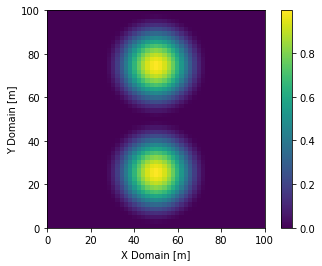

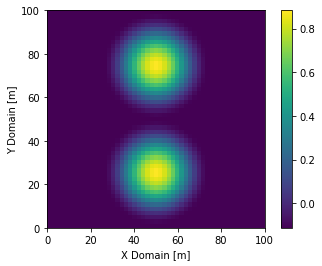

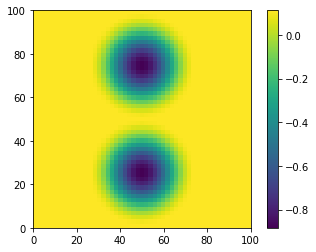

In [12]:
#unpacking:
"""
newarray = []
with open('Normalized_vorticity.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\t')
    for row in readCSV:
        newarray +=[converter(unpack(row[0]))]
"""
        
#VORT_R = np.array(newarray, dtype = float)
        
        
def unpack(string):
    result = []
    temp = ""
    i = 0
    while (i < len(string)):
        if string[i] == '.':
            if (string[i-2]=='-'):
                temp+="-0."
            else:
                temp+="0."
            for k in range(1,7):
                temp+=string[i+k]
            result+=[temp]
        temp =""
        i+=1
    return result


def converter(array):
    newarr= []
    for i in array:
        newarr+= [float(i)]
    return(newarr)


    

def twoDSum (array):
    newarr = []
    for i in array:
        newarr+=[math.fsum(i)]
    return (math.fsum(newarr))




# from numpy import math
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
np.core
from sys import maxsize
from numpy import set_printoptions
set_printoptions(threshold=maxsize)

print("hi")
#*****************Constants********************#
Lx = 100
Nx = 51
Ly = 100
Ny = 51
dx = 2.0 #2
dy = 2.0 #2


A= 1
r = 25.0
tol = 10**-7

x_int_1 = 50.0
y_int_1 = 25.0
x_int_2 = 50.0
y_int_2 = 75.0



VORT = np.zeros((Nx+2, Ny+2), dtype = float)

for i in range(1,Nx+1): #51 physical node
    for j in range(1,Ny+1):
        d_1 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_1)**2 + ((j-1)*dy - y_int_1)**2)))
        d_2 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_2)**2 + ((j-1)*dy - y_int_2)**2))) 
        VORT[i][j] = 0.5*A*(math.cos(d_1*math.pi)+1) + 0.5*A*(math.cos(d_2*math.pi)+1)

#Boundary Condition
for j in range(0,Ny+2):
    VORT[Nx+1][j] = 0
    VORT[0][j] = 0
    VORT[1][j] = VORT[Nx][j]
for i in range(0,Nx+2):
    VORT[i][Ny+1] = VORT[i][2]
    VORT[i][0] = VORT[i][Ny-1]
    VORT[i][1] = VORT[i][Ny]
print("finish VORT initialize")



#print(VORT[1:-1,1:-1])


plt.figure(0)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.savefig("INT,UNNORM-VORT-run_a.svg")

VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)

VORT_loop_counter = 0


        #AVERGING
while (VORT_Avg >  tol):
    for i in range(0,Nx+2):
        for j in range(0,Ny+2):
            VORT[i][j] = VORT[i][j] - VORT_Avg
            
    VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)
    VORT_loop_counter+=1
 
print("VORT loop counter", VORT_loop_counter)

print("mean vorticity = ", VORT_Avg)





#print(data)
#result = numpy.array(x).astype("float")
#print("this is x" , x)

plt.figure(1)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.savefig("INT,NORM-VORT-run_a.svg")

#VORT = np.transpose(VORT_R)

#print(VORT)

#*****************Advancing Lists********************#
PHI = np.zeros((Nx+2, Ny+2), dtype = float)
Residual = np.zeros((Nx+2, Ny+2), dtype = float)

#Initial residual:             #####UPDATE PHYSICAL ONLY???##########
for i in range( 0,Nx+2): 
    for j in range(0,Ny+2):
        Residual[i][j] =  -(VORT[i][j])

plt.figure(100)
plt.imshow( np.transpose(Residual[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()



"""
for a in range(0,Ny+2):
    Residual[Nx+1][a] = Residual[2][a]
    Residual[0][a] = Residual[Nx-1][a]
    Residual[1][a] = Residual[Nx][a]
for b in range(0,Nx+2):
    Residual[b][Ny+1] = Residual[b][2]
    Residual[b][0] = Residual[b][Ny-1]
    Residual[b][1] = Residual[b][Ny]

"""    
  
print("finish Residual initialization")

"""
PHI[0][0] = -999.0
PHI[0][52] = -999.0
PHI[52][52] = -999.0
PHI[52][0] = -999.0

Residual[0][0] = -999.0
Residual[0][52] = -999.0
Residual[52][52] = -999.0
Residual[52][0] = -999.0
"""
#test #print(u_cur.shape)
#result = 53x53

###########################Criterion for Convergence#######################

EPS = np.amax(np.absolute(Residual))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[1:-1,1:-1])))+ np.amax(np.absolute(VORT)))
print("This is initial EPS = " ,EPS)

########################### ALPHA #######################   

beta = dx/dy
sigma = (1/(1+beta**2))*(math.cos(3.141592654/Nx) + math.cos(3.141592654/Ny)*beta**2)
alpha = 2/(1+math.sqrt(1-sigma**2))

#alpha = 1.5
print("sigma =", sigma)    
print("alpha =", alpha)
    
    
timeStep2 = []
EPScounter2 = []    
    
#***************MAIN LOOP*********************#
maincounter = 0
print("entering main loop")

while (EPS> tol):

    for j in range(1,Ny+1):  
        
        #update ghost nodes along phi[i][Ny+1]
        if (j == Ny):  #IMPORTANT , NY-1 for wall
            for z in range(0,Nx+2): 
                PHI[z][Ny+1] = PHI[z][2]
        #update finish
        
        for i in range(1,Nx+1): #51 physical node WALL
            
            #update ghost nodes along phi[Nx+1][j]
            if (i == Nx):
                for k in range(0,Ny+2):
                    PHI[Nx+1][k] = PHI[2][k]
            #update finish

            Residual[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j]) + (1/dy**2)*(PHI[i][j-1] -2*PHI[i][j] + PHI[i][j+1]) - VORT[i][j]
            
            PHI[i][j] = PHI[i][j] + (alpha*Residual[i][j])/(2*((1/dx**2)+(1/dy**2)))
        
        #Update ghosts at PHI[0][j]
        for k in range(0,Ny+2):
            PHI[0][k] = PHI[Nx-1][k]
            PHI[1][k] = PHI[Nx][k] #make sure left right equal
            
    #update finish
    for t in range(0,Nx+2):
        PHI[t][0] = PHI[t][Ny-1]
        PHI[t][1] = PHI[t][Ny] 
    #make sure left right equal
    
    #update finish
    #Update ghosts at PHI[i][0]
    tempResidual = np.copy(Residual)
    tempResidual = np.absolute(tempResidual[1:-1,1:-1])
    
    EPS = np.amax(np.absolute(Residual))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[1:-1,1:-1])))+ np.amax(np.absolute(VORT)))
    print('EPS is', EPS, '  MainCounter =', maincounter, "Max of abs Value = "  , np.amax(np.absolute(Residual[1:-1,1:-1])))
    print(" Index of max abs = ", np.unravel_index(tempResidual.argmax(), tempResidual.shape))
    
    maincounter +=1
    timeStep2 += [maincounter]
    EPScounter2 +=[EPS]

#URN
#PHI = forceEqual(PHI)
#PHI = np.transpose(forceEqual(np.transpose(PHI)))
"""
    
"""  
        
#print(EPS)        
  
 
    
#print((PHI[1:-1,1:-1]))
    



#NUMERICAL VORTICITY
VORT_NUM = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1, Nx+1):
    for j in range(1,Ny+1):
        VORT_NUM[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j])+(1/dy**2)*(PHI[i][j-1]-2*PHI[i][j]+ PHI[i][j+1])
        
plt.figure(5)
plt.ylabel ("Y-Domain [m]")
plt.xlabel("X-Domain [m]") 
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
                            #URN
plt.imshow( np.transpose(VORT_NUM[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()
plt.savefig("NUM_VORT_RUNA.svg")


#quiver plot

U = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        U[i][j] = (PHI[i][j-1]-PHI[i][j+1])/(2*dy)
    
V = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        V[i][j] = (PHI[i+1][j]-PHI[i-1][j])/(2*dx)

x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)   
    
plt.figure(4)
plt.ylabel ("Y-Domain [m]")
plt.xlabel("X-Domain [m]") 
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.imshow( np.transpose(PHI[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()                           #URN
plt.quiver(X, Y, np.transpose(U[1:-1,1:-1]), np.transpose(V[1:-1,1:-1]))        



plt.savefig('quiver_RUNA.svg', dpi = 300)



plt.figure(10)
VORT_DIFF = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        VORT_DIFF[i][j]=VORT_NUM[i][j]-VORT[i][j]
        VORT_DIFF[i][j]=VORT_NUM[i][j]-VORT[i][j]
plt.ylabel ("Y-Domain [m]")
plt.xlabel("X-Domain [m]")          
plt.imshow( np.flip(np.transpose(np.absolute(VORT_DIFF[2:-1,2:-1])), axis = 0), interpolation='none', extent=[0,100,0,100])
plt.colorbar()
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.savefig('numdiffRUN A.svg', dpi = 300)




plt.figure(11)
plt.plot(timeStep2, EPScounter2, color = 'r')
plt.xscale("linear")
plt.yscale("log")
plt.ylabel ("EPS")
plt.xlabel("Time Step")
plt.title("Epsilon - Time Step Graph [RUN A]")
plt.xlim(0,4000)

plt.savefig("EPS-TIME_RUNA.svg")
"""
plt.plot(timeStep2, EPScounter2, color = 'r', label = 'RUN A (Periodic)')
plt.xscale("linear")
plt.yscale("log")
plt.xlim(0,4000)
plt.title("Epsilon - Time Step Graph")

plt.plot(timeStep, EPScounter, color = 'b', label = 'RUN B (Dirichlet + Periodic)')
plt.xscale("linear")
plt.yscale("log")
plt.ylabel ("EPS")
plt.xlabel("Time Step")
plt.legend(loc='upper right',bbox_to_anchor=(1, 1))
plt.savefig("EPS-TIME_BothRuns.svg")
"""
print(VORT_DIFF)

hi
finish VORT initialize
VORT loop counter 1
mean vorticity =  -1.0799170520190873e-17
finish Residual initialization
This is initial EPS =  1.0
sigma = 0.998103328736549
alpha = 1.8840181363390607
entering main loop
EPS is 0.0010898399410014436   MainCounter = 0 Max of abs Value =  7.442027571123327
 Index of max abs =  (29, 16)
EPS is 0.0004978351824556816   MainCounter = 1 Max of abs Value =  6.249382599120538
 Index of max abs =  (28, 15)
EPS is 0.0003042324258660387   MainCounter = 2 Max of abs Value =  5.333584486459953
 Index of max abs =  (27, 14)
EPS is 0.00021550783166248428   MainCounter = 3 Max of abs Value =  4.718920463760123
 Index of max abs =  (27, 38)
EPS is 0.0001651854474958508   MainCounter = 4 Max of abs Value =  4.253906480914275
 Index of max abs =  (26, 38)
EPS is 0.00013343552281561594   MainCounter = 5 Max of abs Value =  3.8922252884218667
 Index of max abs =  (26, 37)
EPS is 0.0001101661797229347   MainCounter = 6 Max of abs Value =  3.5468504558006932
 In

 Index of max abs =  (0, 0)
EPS is 8.960234310536877e-08   MainCounter = 81 Max of abs Value =  0.11223758344770957
 Index of max abs =  (0, 0)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

Text(0.5, 1.0, 'Epsilon - Time Step Graph [RUN B]')

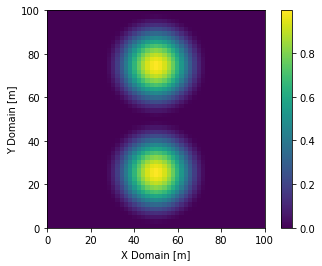

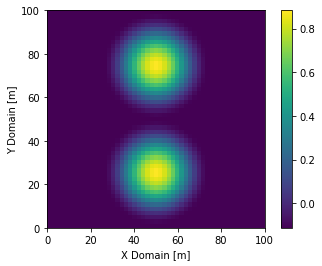

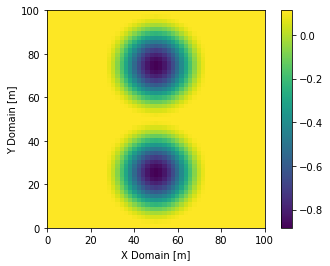

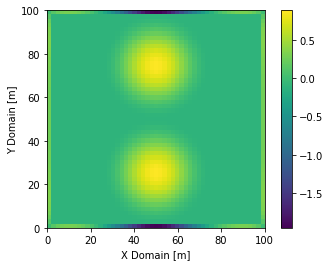

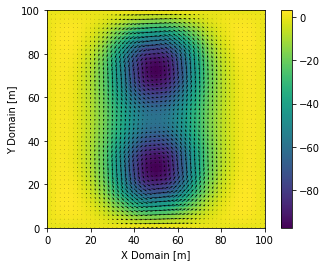

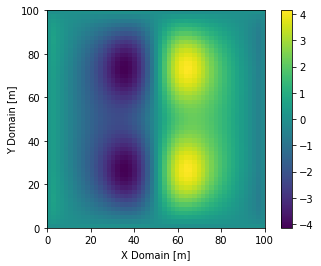

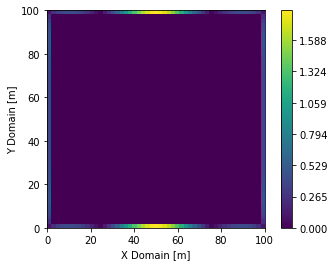

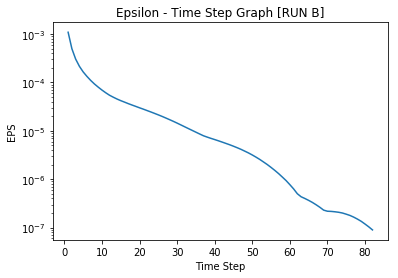

In [18]:




# from numpy import math
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
np.core
from sys import maxsize
from numpy import set_printoptions
set_printoptions(threshold=maxsize)

print("hi")





#*****************Constants********************#
Lx = 100
Nx = 51
Ly = 100
Ny = 51
dx = 2.0 #2
dy = 2.0 #2


A= 1
r = 25.0
tol = 10**-7

x_int_1 = 50.0
y_int_1 = 25.0
x_int_2 = 50.0
y_int_2 = 75.0

#*************Functions******************#

def twoDSum (array):
    newarr = []
    for i in array:
        newarr+=[math.fsum(i)]
    return (math.fsum(newarr))


def U_func (PHI):
    U = np.zeros((Nx+2, Ny+2), dtype = float)
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            U[i][j] = (PHI[i][j-1]-PHI[i][j+1])/(2*dy)
    return (U)
    
def V_func (PHI):
    V = np.zeros((Nx+2, Ny+2), dtype = float)
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            V[i][j] = (PHI[i+1][j]-PHI[i-1][j])/(2*dx)
    return (V)

#*************Vorticity Initilaize******************#

VORT = np.zeros((Nx+2, Ny+2), dtype = float)

for i in range(1,Nx+1): #51 physical node
    for j in range(1,Ny+1):
        d_1 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_1)**2 + ((j-1)*dy - y_int_1)**2)))
        d_2 = min(1, (1/r)*(math.sqrt(((i-1)*dx-x_int_2)**2 + ((j-1)*dy - y_int_2)**2))) 
        VORT[i][j] = 0.5*A*(math.cos(d_1*math.pi)+1) + 0.5*A*(math.cos(d_2*math.pi)+1)

#Boundary Condition
for j in range(0,Ny+2):
    VORT[Nx+1][j] = 0
    VORT[0][j] = 0
    VORT[1][j] = VORT[Nx][j]
for i in range(0,Nx+2):
    VORT[i][Ny+1] = VORT[i][2]
    VORT[i][0] = VORT[i][Ny-1]
    VORT[i][1] = VORT[i][Ny]
print("finish VORT initialize")



#print(VORT[1:-1,1:-1])


plt.figure(0)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()

plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.savefig("INT,UNNORM-VORT-run_B.svg")



VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)
VORT_loop_counter = 0

        #AVERGING
while (VORT_Avg >  tol):
    for i in range(0,Nx+2):
        for j in range(0,Ny+2):
            VORT[i][j] = VORT[i][j] - VORT_Avg
            
    VORT_Avg = twoDSum(VORT[1:-1,1:-1])/(VORT[1:-1,1:-1].size)
    VORT_loop_counter+=1
 
print("VORT loop counter", VORT_loop_counter)

print("mean vorticity = ", VORT_Avg)





#print(data)
#result = numpy.array(x).astype("float")
#print("this is x" , x)

plt.figure(1)
plt.imshow( np.transpose(VORT[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()

plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
#plt.savefig("INT,NORM-VORT-run_B.svg")
#VORT = np.transpose(VORT_R)

#print(VORT)

#*****************Advancing Lists********************#
PHI = np.zeros((Nx+2, Ny+2), dtype = float)
Residual = np.zeros((Nx+2, Ny+2), dtype = float)


U = np.zeros((Nx+2, Ny+2), dtype = float)
V = np.zeros((Nx+2, Ny+2), dtype = float)
#Initial residual:             
for i in range( 0,Nx+2): 
    for j in range(0,Ny+2):
        Residual[i][j] =  -(VORT[i][j])

plt.figure(100)
plt.imshow( np.transpose(Residual[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")




"""
for a in range(0,Ny+2):
    Residual[Nx+1][a] = Residual[2][a]
    Residual[0][a] = Residual[Nx-1][a]
    Residual[1][a] = Residual[Nx][a]
for b in range(0,Nx+2):
    Residual[b][Ny+1] = Residual[b][2]
    Residual[b][0] = Residual[b][Ny-1]
    Residual[b][1] = Residual[b][Ny]

"""    
  
print("finish Residual initialization")


#test #print(u_cur.shape)
#result = 53x53

###########################Criterion for Convergence#######################

EPS = np.amax(np.absolute(Residual))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[1:-1,1:-1])))+ np.amax(np.absolute(VORT)))
print("This is initial EPS = " ,EPS)

########################### ALPHA #######################   

beta = dx/dy
sigma = (1/(1+beta**2))*(math.cos(3.141592654/Nx) + math.cos(3.141592654/Ny)*beta**2)
alpha = 2/(1+math.sqrt(1-sigma**2))
print("sigma =", sigma)    
print("alpha =", alpha)

timeStep = []
EPScounter = []

#***************MAIN LOOP*********************#
maincounter = 0
print("entering main loop")

while (EPS > tol):

    for j in range(2,Ny):  
        
        #update ghost nodes along phi[i][Ny+1]
        if (j == Ny):  #IMPORTANT , NY-1 for wall
            for z in range(0,Nx+2): 
                PHI[z][Ny+1] = PHI[z][2]
        #update finish
        
        for i in range(2,Nx): #51 physical node WALL
            
            #update ghost nodes along phi[Nx+1][j]
            if (i == Nx):
                for k in range(0,Ny+2):
                    PHI[Nx+1][k] = PHI[2][k]
            #update finish

            Residual[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j]) + (1/dy**2)*(PHI[i][j-1] -2*PHI[i][j] + PHI[i][j+1]) - VORT[i][j]
            
            PHI[i][j] = PHI[i][j] + (alpha*Residual[i][j])/(2*((1/dx**2)+(1/dy**2)))
        
        #Update ghosts at PHI[0][j]
        for k in range(0,Ny+2):
            PHI[0][k] = PHI[Nx-1][k]
            PHI[1][k] = PHI[Nx][k] #make sure left right equal
            
    #update finish
    for t in range(0,Nx+2):
        PHI[t][0] = PHI[t][Ny-1]
        PHI[t][1] = PHI[t][Ny] 
    #make sure left right equal
    
    #update finish
    #Update ghosts at PHI[i][0]
    tempResidual = np.copy(Residual)
    tempResidual = np.absolute(tempResidual[1:-1,1:-1])
    
    EPS = np.amax(np.absolute(Residual[2:-2,2:-2]))/((2*((1/dx**2)+(1/dy**2))*twoDSum(np.absolute(PHI[2:-2,2:-2])))+ np.amax(np.absolute(VORT[2:-2,2:-2])))
    print('EPS is', EPS, '  MainCounter =', maincounter, "Max of abs Value = "  , np.amax(np.absolute(Residual[1:-1,1:-1])))
    print(" Index of max abs = ", np.unravel_index(tempResidual.argmax(), tempResidual.shape))
    maincounter +=1
    timeStep += [maincounter]
    EPScounter +=[EPS]

#URN
PHI = forceEqual(PHI)
PHI = np.transpose(forceEqual(np.transpose(PHI)))
"""
    
"""  
        
#print(EPS)        
  
 
    
#print((PHI[1:-1,1:-1]))
    
    


#NUMERICAL VORTICITY
VORT_NUM = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1, Nx+1):
    for j in range(1,Ny+1):
        VORT_NUM[i][j] = (1/dx**2)*(PHI[i-1][j] -2*PHI[i][j] + PHI[i+1][j])+(1/dy**2)*(PHI[i][j-1]-2*PHI[i][j]+ PHI[i][j+1])
        
plt.figure(5)


x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
X,Y = np.meshgrid(x,y)
                            #URN
plt.imshow( np.transpose(VORT_NUM[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()
#plt.savefig("NumVort_RUN_B.svg", dpi = 300)


#quiver plot


U = np.copy(U_func(PHI))
V = np.copy(V_func(PHI))


plt.figure(4)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.imshow( np.transpose(PHI[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()#URN
plt.quiver(X, Y, np.transpose(U[1:-1,1:-1]), np.transpose(V[1:-1,1:-1]))        
#plt.savefig('quiverB.svg', dpi = 300)



plt.figure(101)
x = np.linspace(0,100,51)
y = np.linspace(0,100,51)
X,Y = np.meshgrid(x,y)
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
plt.imshow( np.transpose(V[1:-1,1:-1]), interpolation='none', extent=[0,100,0,100])
plt.colorbar()#URN
#plt.quiver(X, Y, np.transpose(U[1:-1,1:-1]), np.transpose(V[1:-1,1:-1]))        
#plt.savefig('quiverB.svg', dpi = 300)





plt.figure(10)
VORT_DIFF = np.zeros((Nx+2, Ny+2), dtype = float)
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        VORT_DIFF[i][j]=VORT_NUM[i][j]-VORT[i][j]
        
plt.imshow( np.transpose(np.absolute(VORT_DIFF[1:-1,1:-1])), interpolation='none', extent=[0,100,0,100])
plt.colorbar(ticks = np.linspace(0,4.5,18,endpoint=True))
plt.xlabel("X Domain [m]")
plt.ylabel("Y Domain [m]")
#plt.savefig('numdiff_RUNB.svg', dpi = 300)
print(VORT_DIFF)

plt.figure(11)
plt.plot(timeStep, EPScounter)
plt.xscale("linear")
plt.xlabel("Time Step")
plt.ylabel("EPS")
plt.yscale("log")
plt.title("Epsilon - Time Step Graph [RUN B]")

#plt.savefig("EPS-TIME_RUNB.svg")

